# Start


In [8]:
import numpy as np
import pandas as pd
from collections import UserDict, defaultdict
import json
import pickle
import ast

In [9]:
def send_to_dataframe(l):
    r=pd.DataFrame.from_dict(l[0],orient='index')
    #print(r)
    for i  in l[1:]:
        #print(e)
        e=pd.DataFrame.from_dict(i,orient='index')
        r=pd.concat([r, e], axis=1)
        #print(r)
    df=r.T.reset_index().drop(columns=['index'])
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    return df

list_of_dictionaries=[]
for line in  open(smiles_datasets_experiments.txt, r):
    line=line.rstrip('n')
    #print(line)
    dictionary = ast.literal_eval(line)
    list_of_dictionaries.append(dictionary)




In [10]:
df=send_to_dataframe(list_of_dictionaries) 
df=df.fillna(0)
#print(df.columns)

generators_labels=['GDSS','STGG','HierVAE','MoFlow','WGAN']
datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity']
structural_metrics=['wl_mmd','nspdk_mmd']
molecular_metrics=molecular_metrics=['valid', 'unique@1000', 'unique@10000', 'FCD/Test', 'SNN/Test' , 'Frag/Test', 'FCD/TestSF','SNN/TestSF',
 'Frag/TestSF', 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight', 'Novelty']
nn_metrics = [ 'precision', 'density', 'recall', 'coverage', 'f1_pr', 'f1_dc', 'fid', 'kid', 'mmd_linear',
               'mmd_rbf']
new_metrics=['AUC_ROC_based_metric_with_nspdk','AUC_ROC_based_metric_with_nn_classifier']

generators=['gdss','stgg','hiervae','moflow','wgan']
df_mean_by_generator=df.groupby('generator_name').mean()
df_mean_by_dataset=df.groupby('dataset').mean()

gdss=df[df.generator_name=='GDSS']
stgg=df[df.generator_name=='STGG']
wgan=df[df.generator_name=='wgan']
hiervae=df[df.generator_name=='hiervae']
moflow=df[df.generator_name=='moflow']

ames=df[df.dataset=='ames']
bbb_martins=df[df.dataset=='bbb_martins']
cyp1a2_veith=df[df.dataset=='cyp1a2_veith']
cyp2c19_veith=df[df.dataset=='cyp2c19_veith']
herg_karim=df[df.dataset=='herg_karim']
lipophilicity=df[df.dataset=='lipophilicity']



#  Correlation

valid                                   NaN
unique@1000                       -0.022912
unique@10000                       0.029690
FCD/Test                          -0.086222
SNN/Test                           0.186122
Frag/Test                          0.047602
FCD/TestSF                         0.178931
SNN/TestSF                         0.131480
Frag/TestSF                             NaN
IntDiv                            -0.156966
IntDiv2                           -0.165264
Filters                            0.283839
logP                              -0.312658
SA                                -0.173961
QED                               -0.412396
weight                             0.057193
Novelty                                 NaN
AUC_ROC_based_metric_with_nspdk    1.000000
dtype: float64

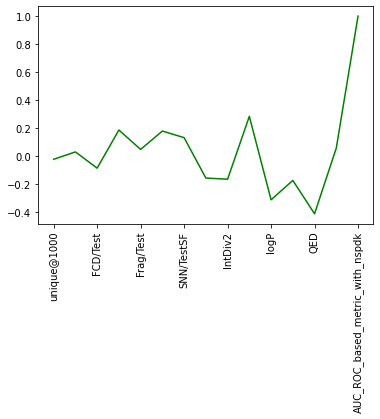

In [4]:
molecular_metrics.append('AUC_ROC_based_metric_with_nspdk')
dft=df[molecular_metrics].apply(pd.to_numeric)
molecular_metrics.pop()
dft.corrwith(dft['AUC_ROC_based_metric_with_nspdk']).dropna().plot(kind='line',rot=90,color="green)
dft.corrwith(dft['AUC_ROC_based_metric_with_nspdk'])

wl_mmd                            -0.390290
nspdk_mmd                         -0.357663
AUC_ROC_based_metric_with_nspdk    1.000000
dtype: float64

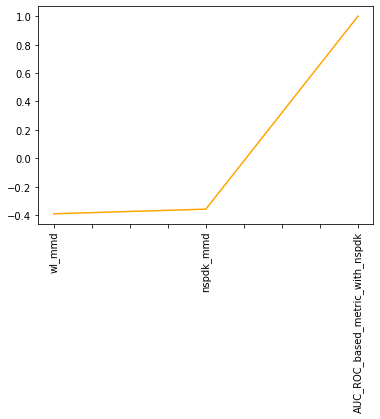

In [5]:
structural_metrics.append('AUC_ROC_based_metric_with_nspdk')
dft2=df[structural_metrics].apply(pd.to_numeric)
structural_metrics.pop()
dft2.corrwith(dft2['AUC_ROC_based_metric_with_nspdk']).plot(kind='line',rot=90,color="orange)
dft2.corrwith(dft2['AUC_ROC_based_metric_with_nspdk'])

<AxesSubplot: >

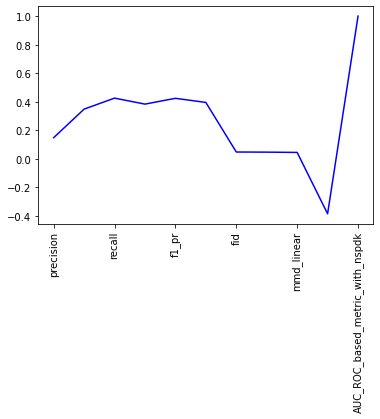

In [6]:
nn_metrics.append('AUC_ROC_based_metric_with_nspdk')
dft3=df[nn_metrics].apply(pd.to_numeric)
nn_metrics.pop()
dft3.corrwith(dft3['AUC_ROC_based_metric_with_nspdk']).plot(kind='line',rot=90,color="blue)

# New metric

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


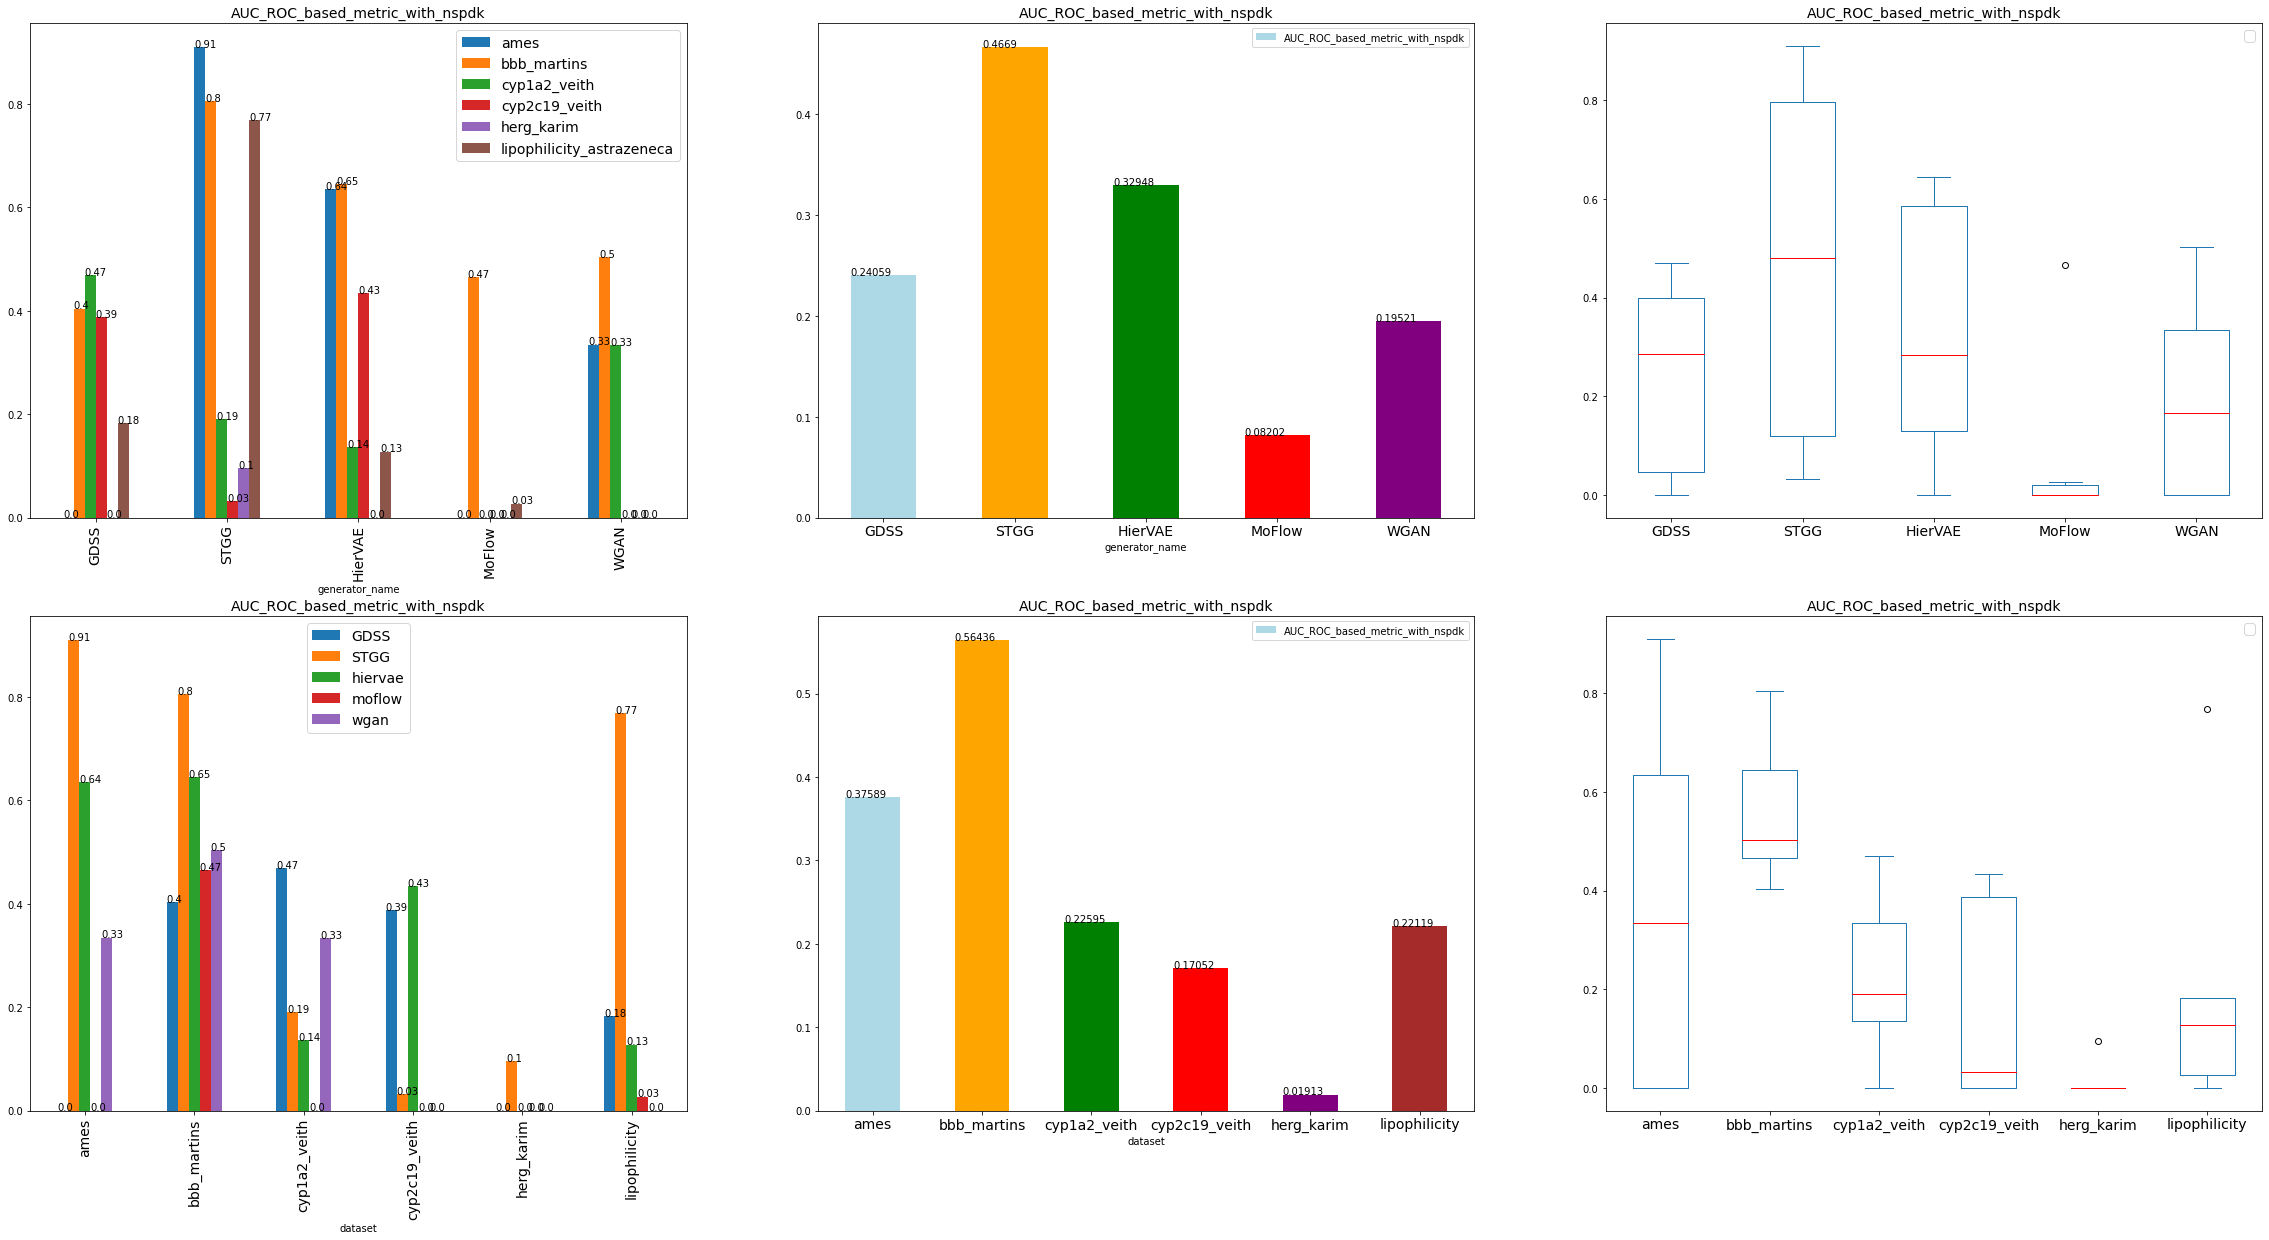

In [184]:

from matplotlib import pyplot as plt
def look_at_data_according_to_a_metric(metric_name):
    c = ['lightblue', 'orange', 'green', 'red', 'purple']

    fig, ax = plt.subplots(2,3,figsize=(40, 20))
    pd.pivot_table(df, index='generator_name', columns='dataset', values=metric_name).plot(ax=ax[0,0],kind='bar')
    ax[0,0].set_title(metric_name,fontsize=14)
    ax[0,0].set_xticklabels(generators_labels,fontdict={'fontsize':14})
    ax[0,0].legend(fontsize=14, loc='upper right')
    for p in ax[0,0].patches:
        ax[0,0].annotate(str(np.round(p.get_height(),2)), (p.get_x(), p.get_height()))



    df_mean_by_generator[metric_name].plot.bar(ax=ax[0,1],rot=0,stacked=False,color =  c)
    ax[0,1].legend(fontsize=10,)
    ax[0,1].set_title(metric_name,fontsize=14)
    ax[0,1].set_xticklabels(generators_labels,fontdict={'fontsize':14})
    # specify the columns to uses for alternate labels, in order based on the order of y=

    for p in ax[0,1].patches:
        ax[0,1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))


    c = ['lightblue', 'orange', 'green', 'red', 'purple','brown']
    pd.pivot_table(df, index='dataset', columns='generator_name', values=metric_name).plot(kind='box',ax=ax[0,2],color=dict(medians='r'))
    ax[0,2].set_title(metric_name,fontsize=14)
    ax[0,2].set_xticklabels(generators_labels,fontdict={'fontsize':14})
    ax[0,2].legend(fontsize=14)

    pd.pivot_table(df, index='dataset', columns='generator_name', values=metric_name).plot(kind='bar',ax=ax[1,0])
    ax[1,0].set_title(metric_name,fontsize=14)
    ax[1,0].set_xticklabels(datasets,fontdict={'fontsize':14})
    ax[1,0].legend(fontsize=14)
    for p in  ax[1,0].patches:
        ax[1,0].annotate(str(np.round(p.get_height(),2)), (p.get_x(), p.get_height()))


    ax[1,1]=df_mean_by_dataset[metric_name].plot.bar(ax=ax[1,1],rot=0,stacked=False,color =  c)
    ax[1,1].legend(fontsize=10)
    ax[1,1].set_title(metric_name,fontsize=14)
    ax[1,1].set_xticklabels(datasets,fontdict={'fontsize':14})
    # specify the columns to uses for alternate labels, in order based on the order of y=
    for p in ax[1,1].patches:
        ax[1,1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height())  )

    
    import matplotlib

    pd.pivot_table(df, index='generator_name', columns='dataset', values=metric_name).plot(kind='box',ax=ax[1,2],color=dict(medians='r'))
    ax[1,2].set_title(metric_name,fontsize=14)
    ax[1,2].set_xticklabels(datasets,fontdict={'fontsize':14})
    ax[1,2].set_label(generators_labels)
    ax[1,2].legend(fontsize=14)

    



look_at_data_according_to_a_metric('AUC_ROC_based_metric_with_nspdk')




In [ ]:
df[['dataset','generator_name','AUC_ROC_based_metric_with_nspdk','AUC_ROC_based_metric_with_nn_classifier','AUC_ROC_based_metric_with_nspdk_time','AUC_ROC_based_metric_with_nn_classifier_time' ]]

dataset generator_name  AUC_ROC_based_metric_with_nspdk  \
0                        ames           STGG                         0.910001   
1                 bbb_martins           STGG                         0.804490   
2                cyp1a2_veith           STGG                         0.190642   
3               cyp2c19_veith           STGG                         0.032063   
4                  herg_karim           STGG                         0.095644   
5   lipophilicity_astrazeneca           STGG                         0.768539   
6                        ames           GDSS                         0.000000   
7                 bbb_martins           GDSS                         0.403887   
8                cyp1a2_veith           GDSS                         0.469383   
9               cyp2c19_veith           GDSS                         0.387284   
10                 herg_karim           GDSS                         0.000000   
11  lipophilicity_astrazeneca           GDSS                         0.183009   
12                       ames        hiervae                         0.635070   
13                bbb_martins        hiervae                         0.645127   
14               cyp1a2_veith        hiervae                         0.135895   
15              cyp2c19_veith        hiervae                         0.433273   
16                 herg_karim        hiervae                         0.000000   
17  lipophilicity_astrazeneca        hiervae                         0.127504   
18                       ames         moflow                         0.000000   
19                bbb_martins         moflow                         0.465204   
20               cyp1a2_veith         moflow                         0.000000   
21              cyp2c19_veith         moflow                         0.000000   
22                 herg_karim         moflow                         0.000000   
23  lipophilicity_astrazeneca         moflow                         0.026889   
24                       ames           wgan                         0.334375   
25                bbb_martins           wgan                         0.503076   
26               cyp1a2_veith           wgan                         0.333808   
27              cyp2c19_veith           wgan                         0.000000   
28                 herg_karim           wgan                         0.000000   
29  lipophilicity_astrazeneca           wgan                         0.000000   

    AUC_ROC_based_metric_with_nn_classifier  \
0                                  1.000000   
1                                  0.000000   
2                                  0.000000   
3                                  0.000000   
4                                  0.000000   
5                                  0.367695   
6                                  0.000000   
7                                  0.000000   
8                                  0.000000   
9                                  0.000000   
10                                 0.000000   
11                                 0.000000   
12                                 0.185535   
13                                 0.914299   
14                                 0.251360   
15                                 0.410571   
16                                 0.357926   
17                                 0.387738   
18                                 0.888163   
19                                 0.713477   
20                                 0.765453   
21                                 0.000000   
22                                 0.201891   
23                                 0.374757   
24                                 0.848980   
25                                 0.000000   
26                                 0.000000   
27                                 0.000000   
28                                 0.688615   
29                                 0.551985   

    AUC_ROC_based_metric_with_nspdk_time  \
0       

## New metrics's Time

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


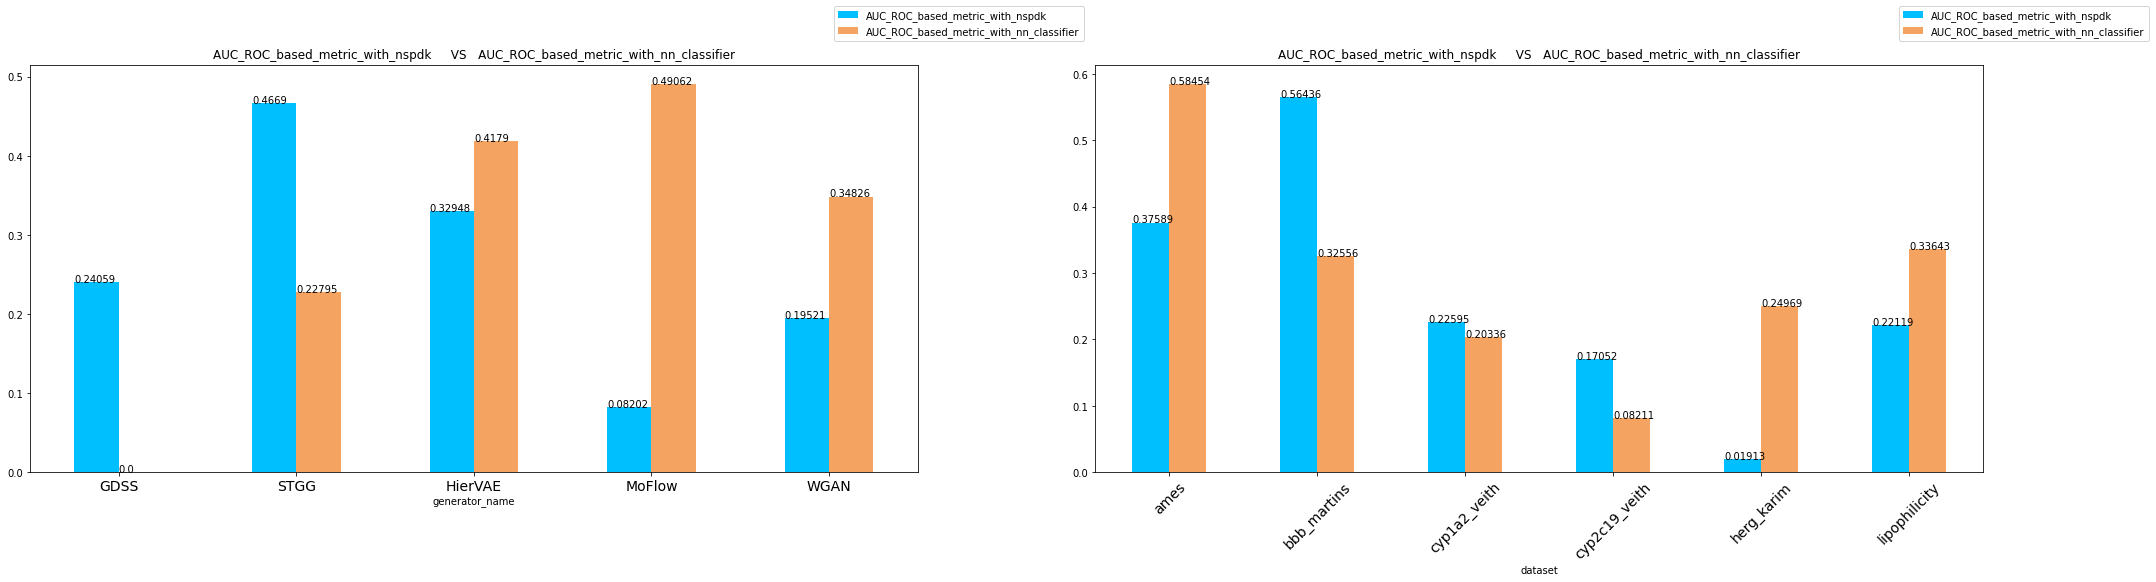

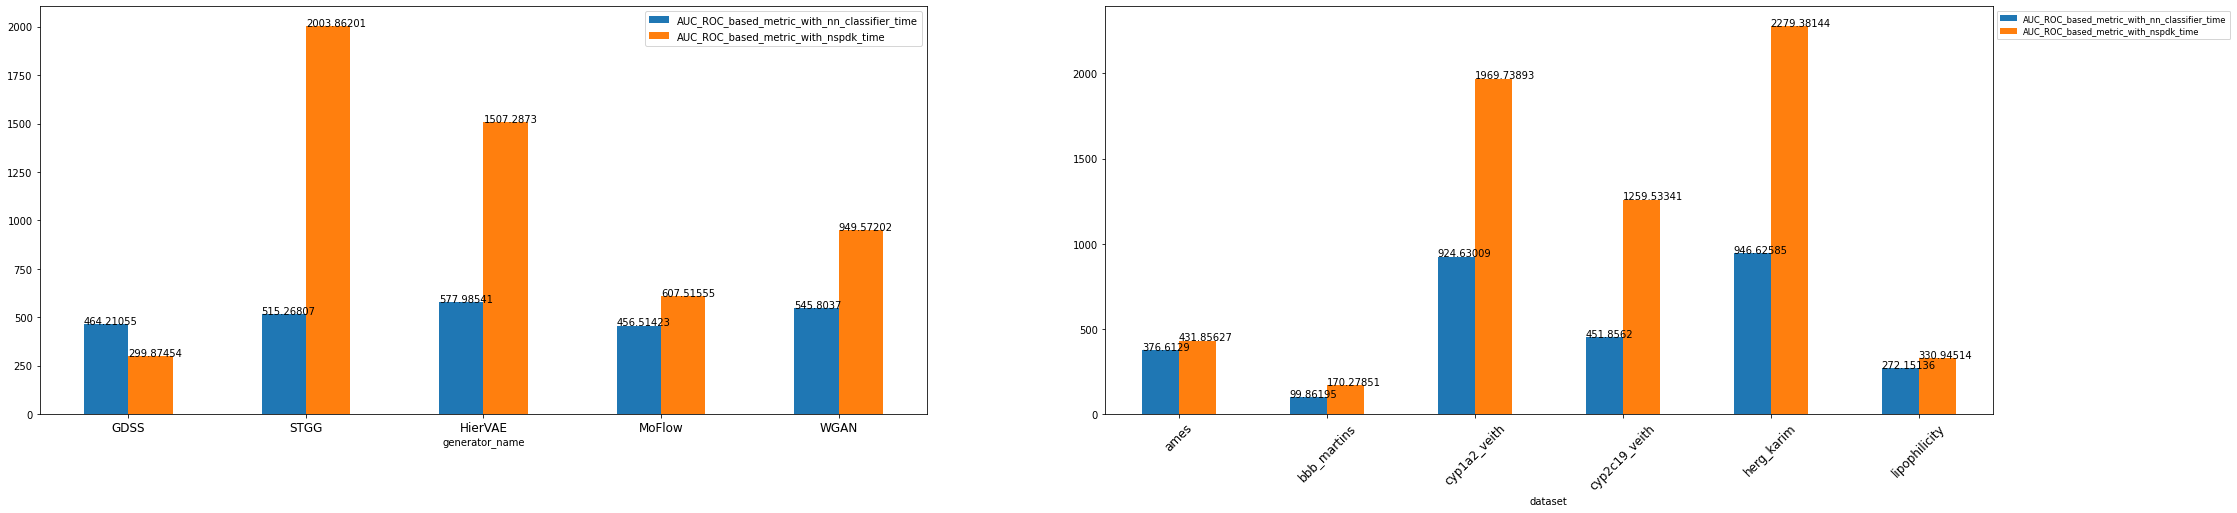

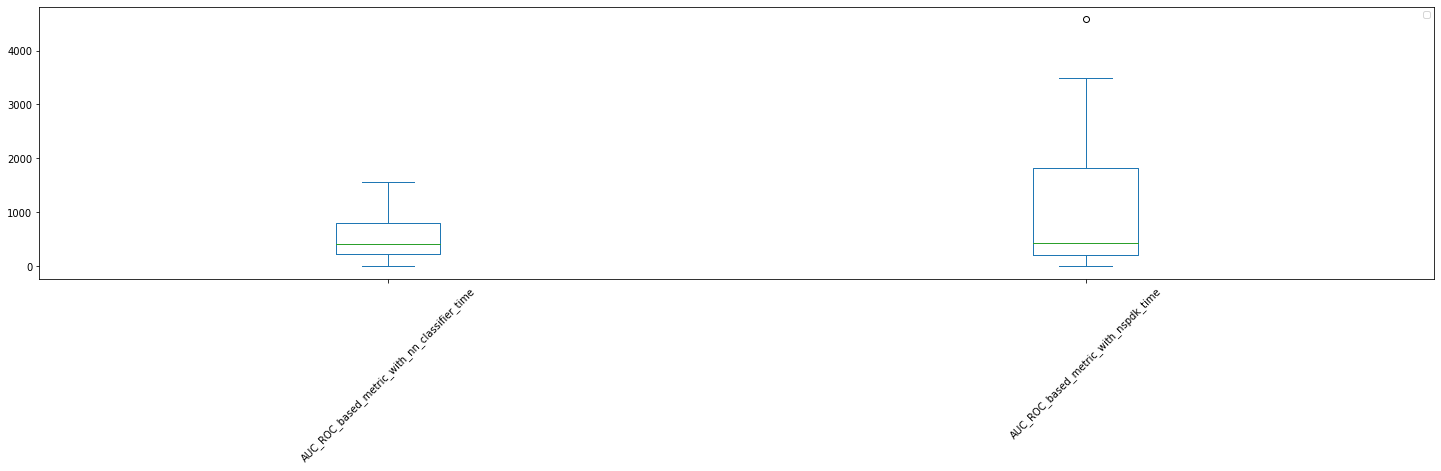

In [ ]:
fix,ax=plt.subplots(1,2,figsize=(35,7.5))
df_mean_by_generator[['AUC_ROC_based_metric_with_nspdk','AUC_ROC_based_metric_with_nn_classifier']].plot.bar(ax=ax[0],rot=0,stacked=False,color="{'deepskyblue','sandybrown'})
ax[0].legend(fontsize=10, loc='center left', bbox_to_anchor=(0.9, 1.1))
ax[0].set_title('AUC_ROC_based_metric_with_nspdk     VS   AUC_ROC_based_metric_with_nn_classifier')
ax[0].set_xticklabels(generators_labels,fontdict={'fontsize':14})
# specify the columns to uses for alternate labels, in order based on the order of y=
for p in ax[0].patches:
    ax[0].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))
#plt.subplots_adjust(right=1.5)

df_mean_by_dataset[['AUC_ROC_based_metric_with_nspdk','AUC_ROC_based_metric_with_nn_classifier']].plot.bar(ax=ax[1],rot=45,stacked=False,color="{'deepskyblue','sandybrown'})
ax[1].legend(fontsize=10, loc='center left', bbox_to_anchor=(0.9, 1.1))
ax[1].set_title('AUC_ROC_based_metric_with_nspdk     VS   AUC_ROC_based_metric_with_nn_classifier')
ax[1].set_xticklabels(datasets,fontdict={'fontsize':14})
# specify the columns to uses for alternate labels, in order based on the order of y=
for p in ax[1].patches:
    ax[1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))


fix,ax=plt.subplots(1,2,figsize=(35,7.5))

ax[1]=df_mean_by_dataset[['AUC_ROC_based_metric_with_nn_classifier_time','AUC_ROC_based_metric_with_nspdk_time']].plot(ax=ax[1],subplots=False,rot=90,kind='bar')
ax[1].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
for p in ax[1].patches:
    ax[1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))

ax[0]=df_mean_by_generator[['AUC_ROC_based_metric_with_nn_classifier_time','AUC_ROC_based_metric_with_nspdk_time']].plot(ax=ax[0],subplots=False,rot=90,kind='bar')
ax[0].set_xticklabels(labels=generators_labels,fontdict={'fontsize':12 }, rotation=0)
plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
for p in ax[0].patches:
    ax[0].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))
fix,ax=plt.subplots(figsize=(25  ,5))

ax=df[['AUC_ROC_based_metric_with_nn_classifier_time','AUC_ROC_based_metric_with_nspdk_time']].plot(ax=ax,subplots=False,rot=45,kind='box')
plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')

# Molecular metrics

In [11]:
from evaluation.utils import get_data,  get_mock_data,remove_empty_graphs_and_targets,
    get_generated_data,preprocess
from evaluation.moses.metrics.utils  import logP, QED, SA,weight
from evaluation.mol_structure import list_of_smiles_to_nx_graphs
from rdkit import Chem
from rdkit.Chem import GetFormalCharge
from collections  import defaultdict

In [12]:
molecular_metrics=['valid', 'unique@1000', 'unique@10000', 'FCD/Test', 'SNN/Test' , 'Frag/Test', 'FCD/TestSF','SNN/TestSF',
 'Frag/TestSF', 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight', 'Novelty']

## Distribution of  QED, logP, SA and molecular weight  properties 




In [22]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
dfs=[]
for dataset_name in current_smiles_datasets:
    smiles = []
    with open('data/smiles/{}/train1_smiles.txt'.format(dataset_name)) as my_file:
        for line in my_file:
         smiles.append(line.strip())
    train1_graphs=smiles
    mols =[Chem.MolFromSmiles(smiles)  for smiles in train1_graphs]
    log_p =[logP(mol) for mol in mols]
    qeds= [QED(mol) for mol in mols]
    sas= [SA(mol) for mol in mols]
    weights=[weight(mol) for mol in mols]
    d1={'generator':'original','dataset':dataset_name,'logP':log_p, 'qed':qeds,'SAS':sas,'weight':weights}
    dfs.append(pd.DataFrame(data=d1))

    

In [ ]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
generators=['gdss','stgg','hiervae','moflow','wgan']
gens=[]
for generator_name in generators:
     for dataset_name in current_smiles_datasets:
                print(generator_name,dataset_name)
                pos_list, neg_list=[],[]
                path_postives='data/smiles/{}/{}_gen_pos_{}.txt'.format(dataset_name,dataset_name,generator_name)
                with open(path_postives) as my_file:
                        for line in my_file:
                                pos_list.append(line.strip())
                path_negatives='data/smiles/{}/{}_gen_neg_{}.txt'.format(dataset_name,dataset_name,generator_name)
                with open(path_negatives) as my_file:
                        for line in my_file:
                                neg_list.append(line.strip())
                smiles=pos_list+neg_list
                train1_graphs=smiles
                try:
                        mols =[Chem.MolFromSmiles(smiles)  for smiles in train1_graphs]
                        log_p =[logP(mol) for mol in mols]
                        qeds= [QED(mol) for mol in mols]
                        sas= [SA(mol) for mol in mols]
                        weights=[weight(mol) for mol in mols]
                        d1={'generator': generator_name,'dataset':dataset_name,'logP':log_p, 'qed':qeds,'SAS':sas,'weight':weights}
                        gens.append(pd.DataFrame(data=d1))

                except:
                        mols =0
                        log_p =0
                        qeds= 0
                        sas= 0
                        weights=0
                
                        d1={'generator': generator_name,'dataset':dataset_name,'logP':[log_p], 'qed':[qeds],'SAS':[sas],'weight':[weights]}
                        gens.append(pd.DataFrame(data=d1))

              
              
                

In [ ]:
new1=pd.concat([dfs[0], dfs[1], dfs[2], dfs[3],dfs[4]], axis=0)
new2=pd.concat([gens[i] for i in range(len(gens))], axis=0)
new=pd.concat([new1,new2], axis=0)
#new.to_csv('out.csv', index=False)

Text(0.5, 1.0, 'Molecular Weight')

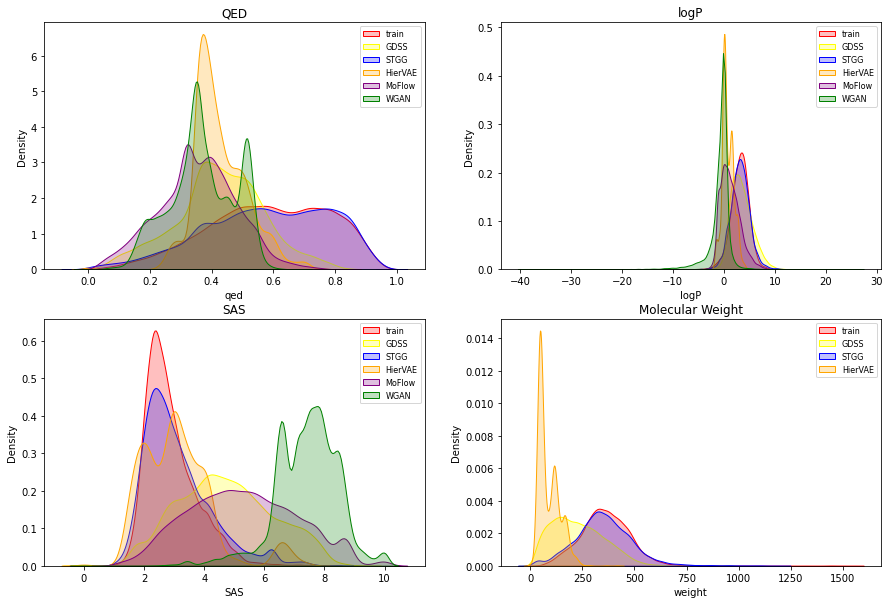

In [172]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(new[new.generator=='original']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])

ax[0,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(new[new.generator=='original']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])

ax[0,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(new[new.generator=='original']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])

ax[1,0].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(new[new.generator=='original']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(new[new.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
#sns.kdeplot(new[new.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
#sns.kdeplot(new[new.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
ax[1,1].legend(labels=['train','GDSS','STGG','HierVAE','MoFlow','WGAN'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


##  Other visualisations

In [187]:
df

generator_name  activations_time           fid  fid_time           kid  \
0            STGG          0.697285  1.373070e+00  0.701735  2.027559e-02   
1            STGG          0.198101  2.081444e+01  0.203780  9.810512e-01   
2            STGG          1.208452  7.121788e+00  1.214427  2.344872e-01   
3            STGG          1.920179  6.600334e+00  1.928179  2.239254e-01   
4            STGG          1.841321  1.022053e+01  1.848253  7.802348e-01   
5            STGG          0.422987  6.318853e+01  0.426965 -1.415697e+01   
6            GDSS          4.199569  4.382522e+01  4.221216  1.608227e+00   
7            GDSS          0.207756  1.422661e+02  0.210669  1.589950e+01   
8            GDSS          1.299549  1.003120e+02  1.305879  1.066468e+01   
9            GDSS          1.309072  1.012459e+02  1.315142  1.309975e+01   
10           GDSS          1.401592  1.746841e+02  1.407839  4.320504e+01   
11           GDSS          0.456290  2.349174e+02  0.460045  6.456170e+01   
12        hiervae          3.750541  7.513678e+01  3.783661  3.737175e+00   
13        hiervae          0.221120  1.291246e+02  0.227032  1.486995e+01   
14        hiervae          1.297531  1.863377e+02  1.304908  4.585158e+01   
15        hiervae          4.080353  2.062220e+02  4.092511  2.902241e+03   
16        hiervae          2.234238  4.300383e+02  2.245057  3.326272e+02   
17        hiervae          0.660830  2.311085e+02  0.668077  6.390121e+01   
18         moflow          1.213328  8.707586e+02  1.222636  1.506762e+04   
19         moflow          0.363896  4.373896e+05  0.378071  1.135160e+12   
20         moflow          1.901933  3.908559e+02  1.909930  1.039882e+03   
21         moflow          5.117385  5.664359e+03  5.126091  2.090765e+08   
22         moflow          1.331600  9.089365e+03  1.340687  6.711443e+07   
23         moflow          0.755304  5.656677e+05  0.760183  5.331649e+12   
24           wgan          0.642907  5.000019e+07  0.651255  4.150974e+19   
25           wgan          0.184893  7.197222e+06  0.191243  2.626299e+16   
26           wgan          1.260328  1.206161e+09  1.271389  1.128699e+23   
27           wgan          0.942293  1.461001e+03  0.949570  1.317364e+04   
28           wgan          1.405971  1.871873e+06  1.415166  2.670790e+14   
29           wgan          0.760231  1.245368e+07  0.773873  1.325860e+17   

     kid_time  precision    recall     f1_pr  precision_time  ...       logP  \
0    0.746667   0.991752  0.938751  0.964534        1.226505  ...   0.182455   
1    0.223870   0.925714  0.798592  0.857477        0.272538  ...   1.030860   
2    1.278845   0.942276  0.845262  0.891147        2.644842  ...   0.207638   
3    2.050599   0.972235  0.836454  0.899258        3.425900  ...   0.208801   
4    1.910412   0.885175  0.792605  0.836346        3.371871  ...   0.725923   
5    0.465437   0.849791  0.904082  0.876106        0.606047  ...   1.098614   
6   11.563381   0.864811  0.221830  0.353103        4.742655  ...   0.390547   
7    0.246352   0.979651  0.404225  0.572317        0.268709  ...   4.999431   
8    1.363241   0.940455  0.025222  0.049145        2.955743  ...   1.207214   
9    1.369094   0.919242  0.211595  0.344019        2.855238  ...   2.026072   
10   1.462787   0.860391  0.028262  0.054745        2.667750  ...   1.813551   
11   0.492480   0.741497  0.005442  0.010825        0.689733  ...   4.754169   
12  15.432893   0.964371  0.175501  0.296974        4.636029  ...   4.394719   
13   0.250141   0.959943  0.118310  0.210673        0.287820  ...   6.246806   
14   1.362577   0.912023  0.082481  0.151298        3.302603  ...   7.496055   
15   4.168527   0.927991  0.044665  0.085246        6.952209  ...   6.822343   
16   2.334840   0.980814  0.047599  0.090810        4.520725  ...  10.559470   
17   0.716565   0.745409  0.002721  0.005442        1.038545  ...   8.096563   
18   1.280452   0.902982  0.165685  0.280010        2.157989  ...   6.367105   
19   0.419379  

In [190]:
molecular_metrics_to_display=['valid', 'Novelty','unique@1000', 'FCD/Test', 'FCD/TestSF','SNN/TestSF','SNN/Test' ,'Frag/Test', 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight']
df_mean_by_generator[molecular_metrics_to_display]

valid  Novelty  unique@1000  FCD/Test  FCD/TestSF  SNN/TestSF  \
generator_name                                                                  
GDSS              1.0      1.0     0.209886  0.079761   53.223910    0.056856   
STGG              1.0      1.0     0.770238  0.002794   53.040614    0.089870   
hiervae           1.0      1.0     0.180617  0.088155   52.961046    0.074442   
moflow            1.0      1.0     0.838017  0.787384   51.932857    0.079162   
wgan              1.0      1.0     0.657790  3.233089   52.935090    0.068101   

                SNN/Test  Frag/Test    IntDiv   IntDiv2   Filters       logP  \
generator_name                                                                 
GDSS            0.924508   0.985594  0.205201  0.179489  0.999659   2.531831   
STGG            0.998676   0.999911  0.307325  0.286557  0.982241   0.575715   
hiervae         0.974186   0.996810  0.397477  0.353504  0.996188   7.269326   
moflow          0.613788   0.916105  0.718671  0.672768  0.257677   8.643670   
wgan            0.190451   0.153545  0.721713  0.628206  0.013020  12.372473   

                      SA       QED       weight  
generator_name                                   
GDSS            0.211136  0.090319   195.799336  
STGG            0.019894  0.012431    24.349490  
hiervae         0.141827  0.116294   290.872822  
moflow          0.737227  0.109564   336.003826  
wgan            1.173135  0.081830  2009.559747

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


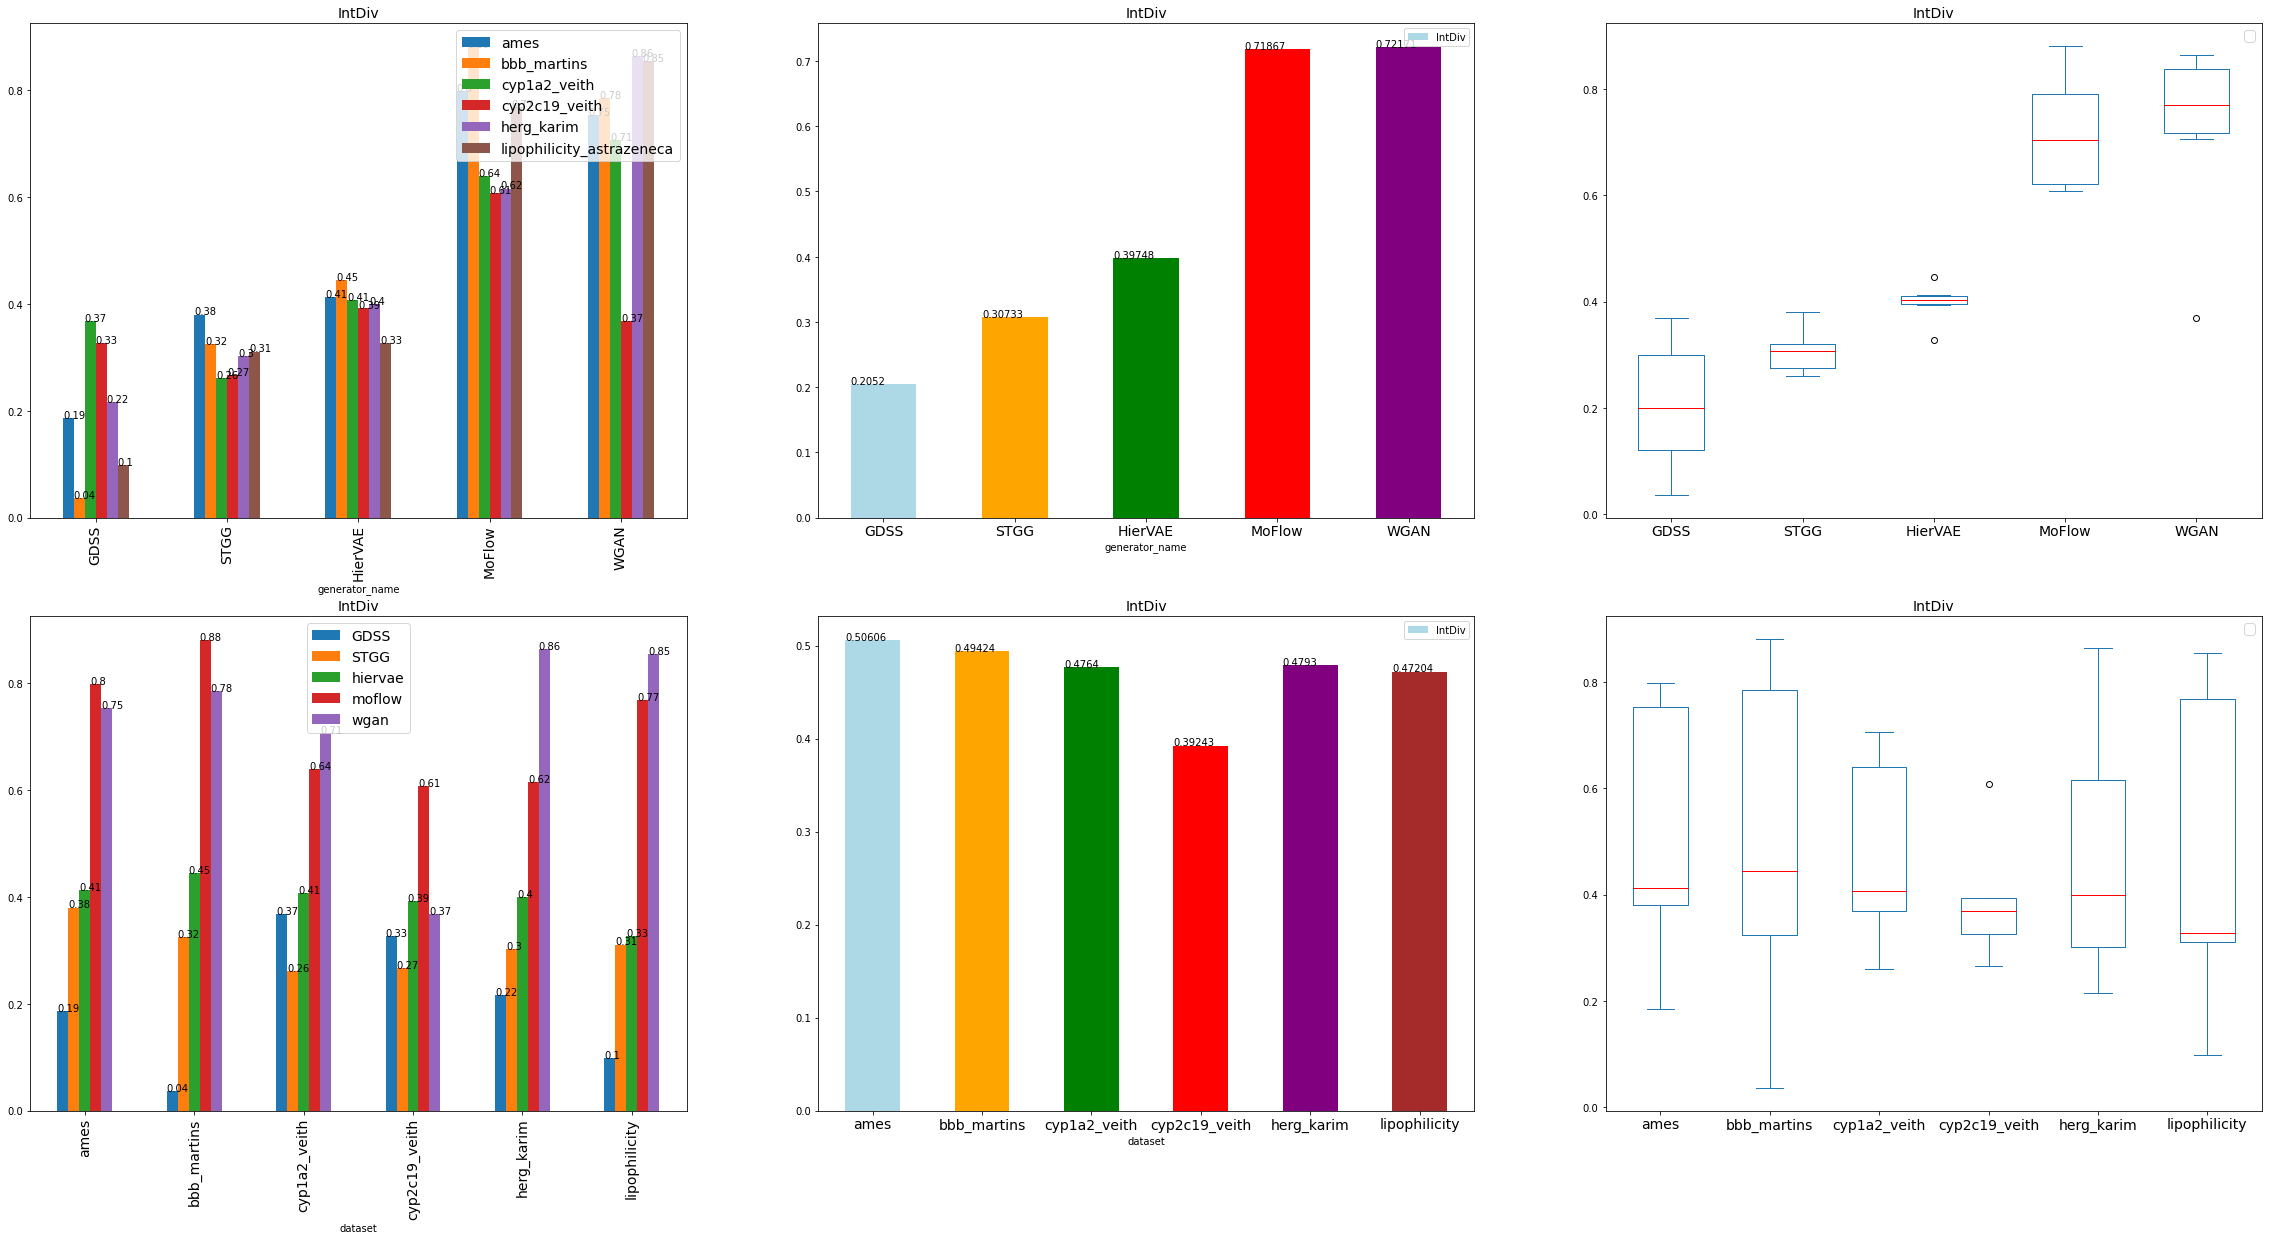

In [186]:
look_at_data_according_to_a_metric('IntDiv')


17
Moelcular metrics


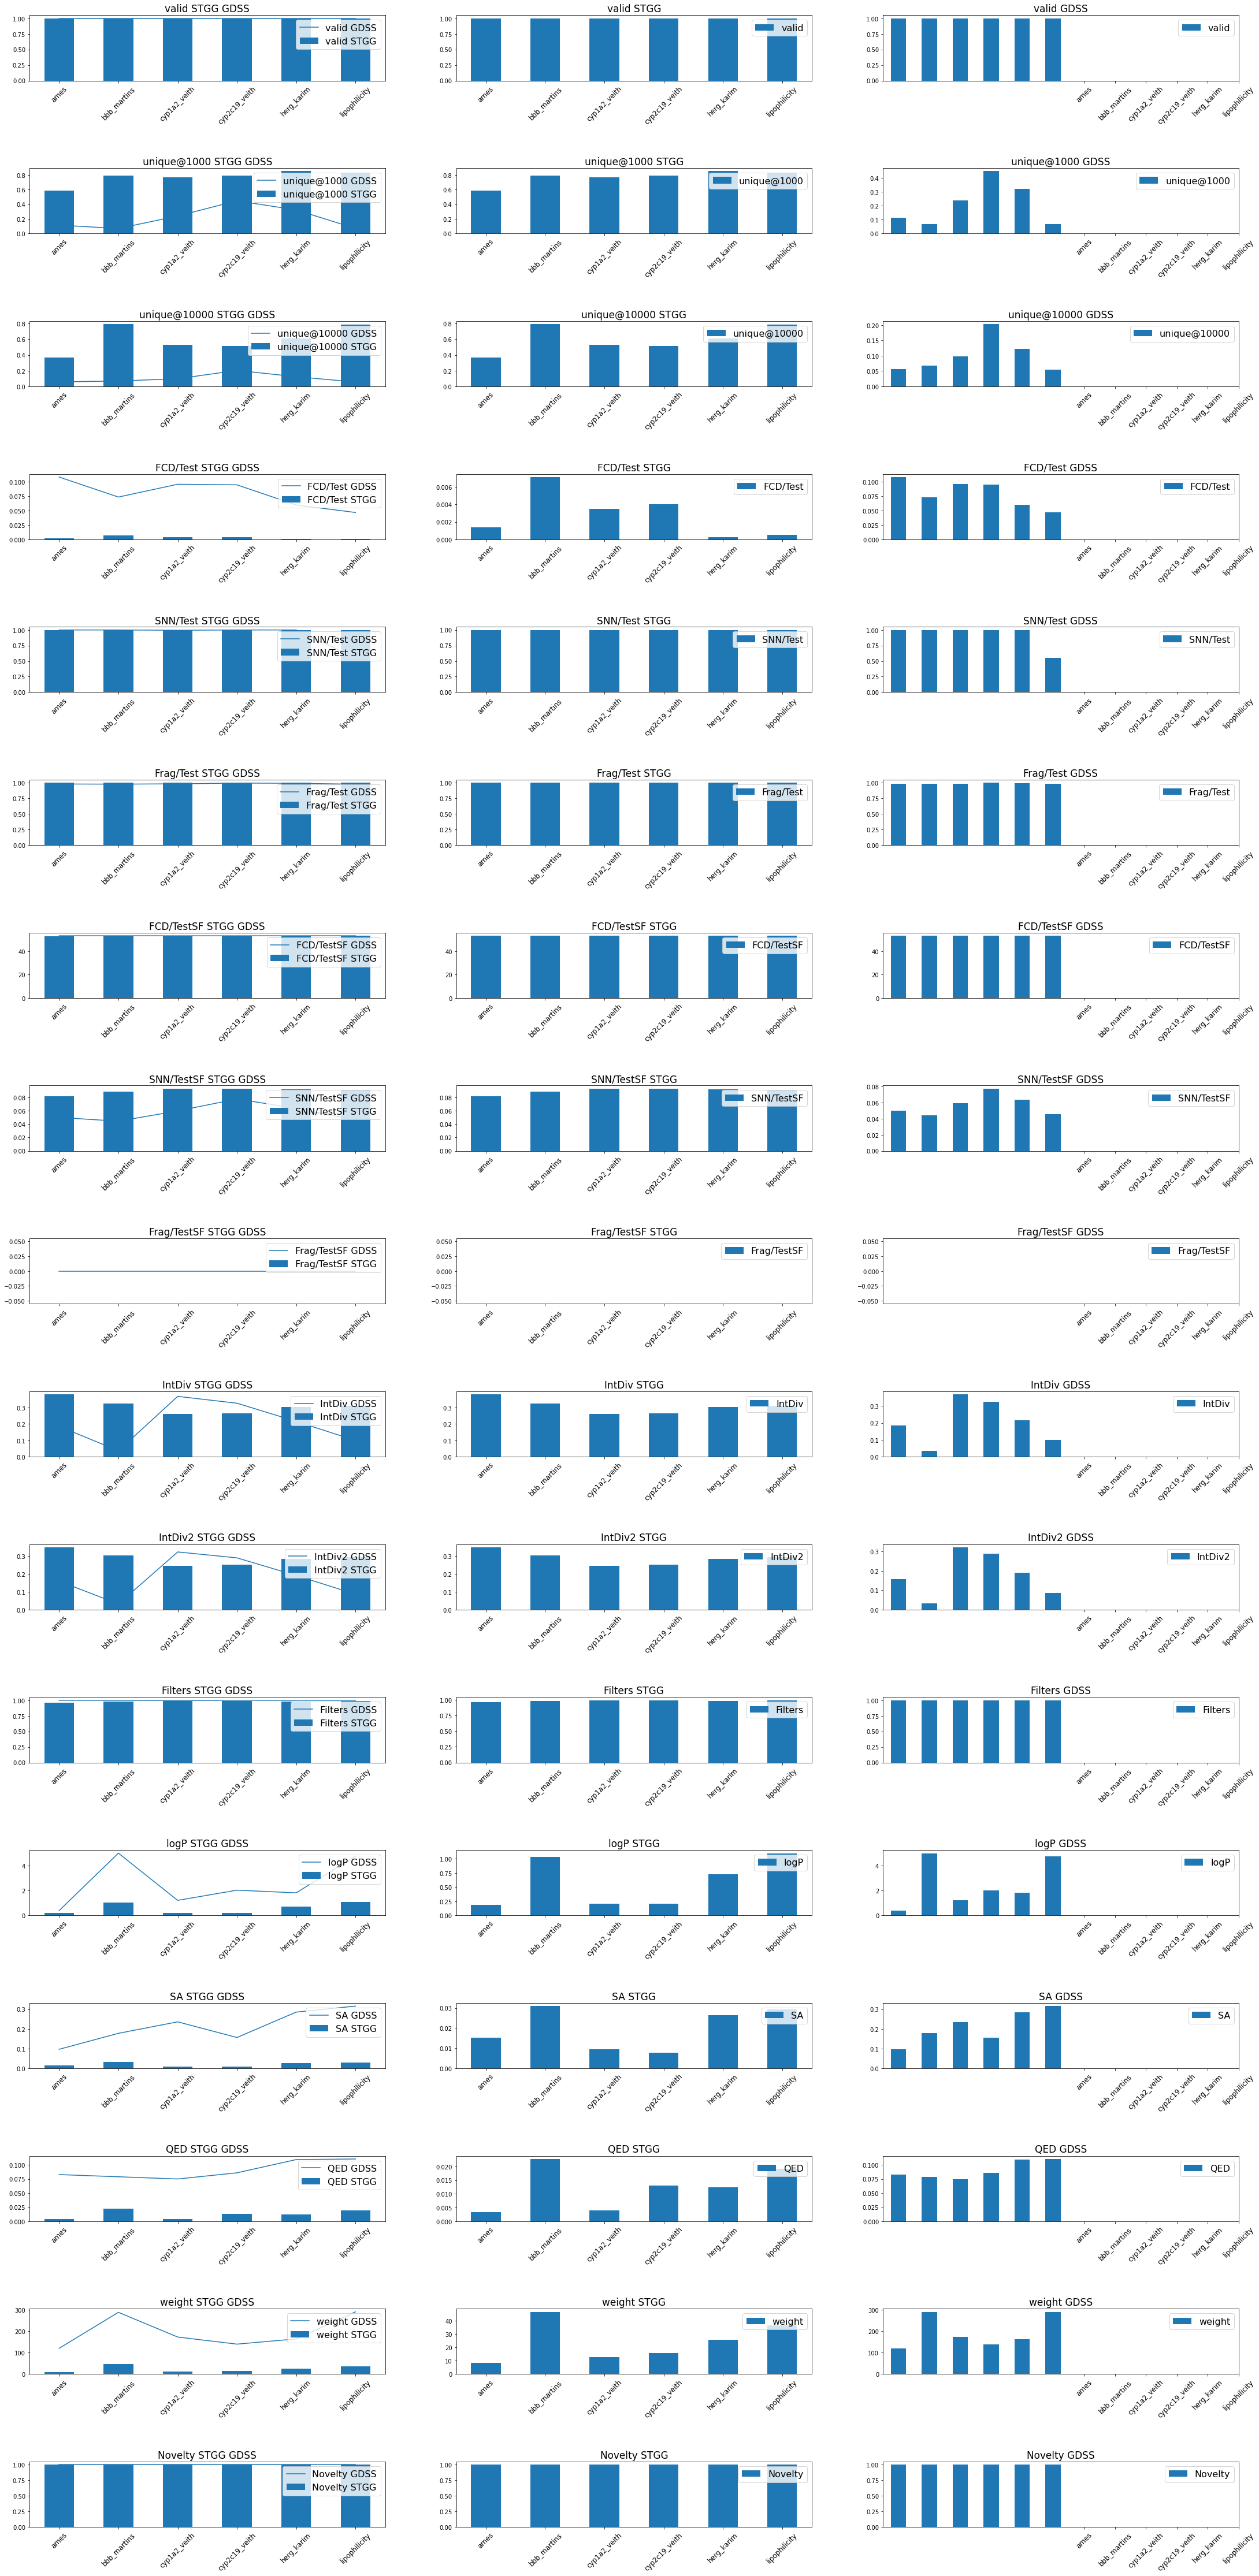

In [180]:
molecular_metrics=['valid', 'unique@1000', 'unique@10000', 'FCD/Test', 'SNN/Test' , 'Frag/Test', 'FCD/TestSF','SNN/TestSF',
 'Frag/TestSF', 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight', 'Novelty']
print(len(molecular_metrics))
to_plot=molecular_metrics
cmapper = np.linspace(0, 1, len(to_plot))
cmapper = {key: cmapper[ix] for ix, key in enumerate(to_plot)}
cmap = plt.get_cmap('viridis')
def get_color(metric):
    return cmap(cmapper[metric])

cmapper_qualitative = {}
for c_ix, key in enumerate(to_plot):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative[key] = plt.cm.tab20(c_ix)

cmapper_qualitative2 = {}
for c_ix, key in enumerate(to_plot):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative2[key] = plt.cm.tab20b(c_ix)
                      
def get_color_qualitative(metric):
    return cmapper_qualitative[metric]

print('Moelcular metrics')
generators= ['STGG', 'GDSS']

mask_STGG= df[df[ 'generator_name']=='STGG']
mask_GDSS=df[df[ 'generator_name']=='GDSS']
datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity']

columns=3
rows=17
fig, ax = plt.subplots(rows,columns,figsize=(7.5, 80))
i=0
x_sticks=[0,1,2,3,4,5]

col=0
for r in range(0,rows):
    y=molecular_metrics[i] 
    mask_STGG[y].plot(x=x_sticks, y=y,kind='bar', ax=ax[r,col], label=molecular_metrics[i]+' STGG')
    mask_GDSS.reset_index(drop=True)[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r,col],label=molecular_metrics[i]+' GDSS')
    ax[r,col].legend(fontsize=16, loc="upper right")
    ax[r,col].set_title(y+' '+generators[0] +' '+ generators[1],fontsize=17)
    ax[r,col].set_xticks(x_sticks)
    ax[r,col].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
    i+=1



plt.subplots_adjust(hspace=1.34,right=1.9)

i=0
col=1
for r in range(0,rows):
    y=molecular_metrics[i]
    mask_STGG[y].plot(x=x_sticks, y=y,kind='bar', ax=ax[r,col])
    ax[r,col].legend(fontsize=16, loc="upper right")
    ax[r,col].set_title(y+' '+generators[0] ,fontsize=17)
    ax[r,col].set_xticks(x_sticks)
    ax[r,col].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
    i+=1
  
plt.subplots_adjust(hspace=1.34,right=1.9)
i=0
col=2
for r in range(0,rows):
    y=molecular_metrics[i]
    mask_GDSS[y].plot(x=x_sticks, y=y,kind='bar', ax=ax[r,col])
    ax[r,col].legend(fontsize=16, loc="upper right")
    ax[r,col].set_title(y+' '+generators[1] ,fontsize=17)
    ax[r,col].set_xticks([6,7,8,9,10,11])
    ax[r,col].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
    i+=1

         
plt.subplots_adjust(hspace=1.34,right=4)

#plt.subplots_adjust(hspace=3)

17
Moelcular metrics


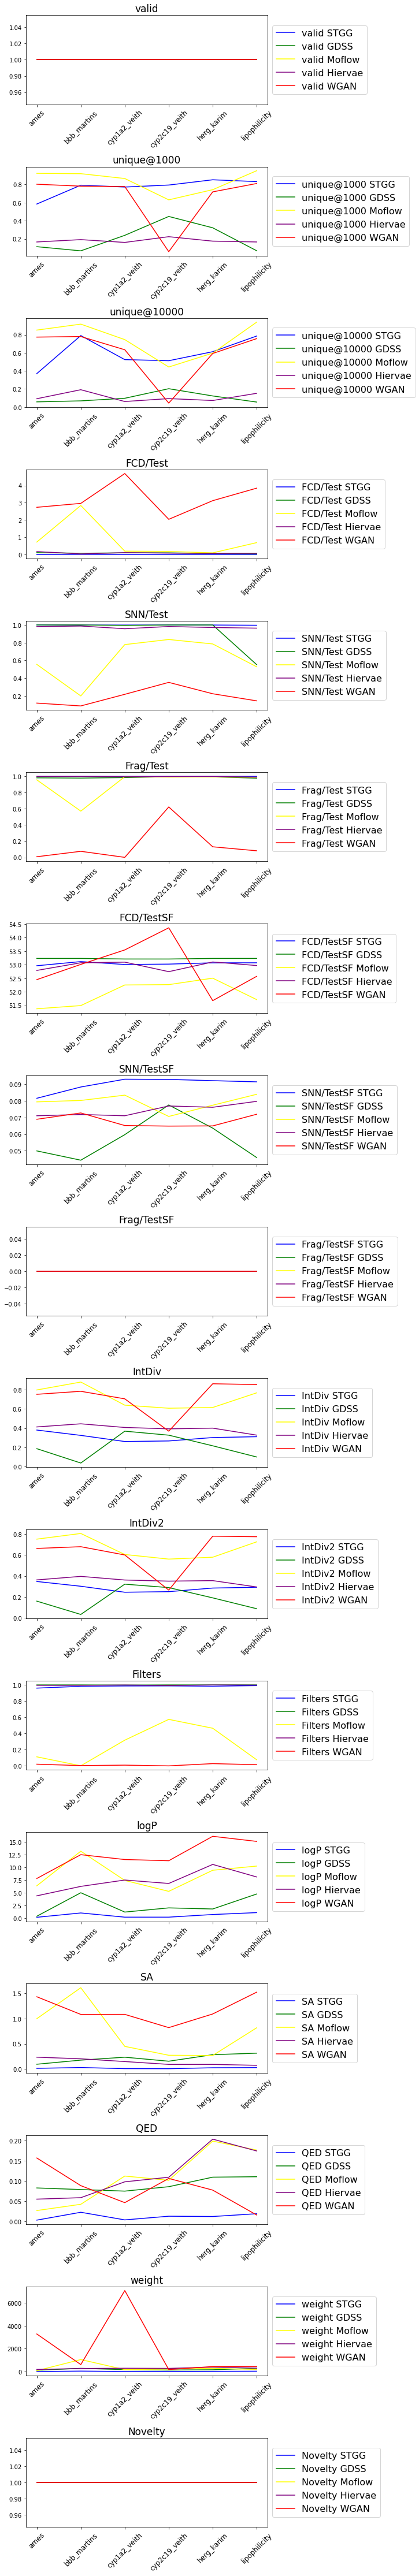

In [ ]:
molecular_metrics=['valid', 'unique@1000', 'unique@10000', 'FCD/Test', 'SNN/Test' , 'Frag/Test', 'FCD/TestSF','SNN/TestSF',
 'Frag/TestSF', 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight', 'Novelty']
print(len(molecular_metrics))
to_plot=molecular_metrics
cmapper = np.linspace(0, 1, len(to_plot))
cmapper = {key: cmapper[ix] for ix, key in enumerate(to_plot)}
cmap = plt.get_cmap('viridis')
def get_color(metric):
    return cmap(cmapper[metric])

cmapper_qualitative = {}
for c_ix, key in enumerate(to_plot):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative[key] = plt.cm.tab20(c_ix)

cmapper_qualitative2 = {}
for c_ix, key in enumerate(to_plot):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative2[key] = plt.cm.tab20b(c_ix)


cmapper_qualitative3 = {}
for c_ix, key in enumerate(to_plot):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative3[key] = plt.cm.tab20c(c_ix)


cmapper_qualitative4 = {}
for c_ix, key in enumerate(to_plot):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative4[key] = plt.cm.Paired(c_ix)

cmapper_qualitative4 = {}
for c_ix, key in enumerate(to_plot):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative4[key] = plt.cm.tab10(c_ix)

cmapper_qualitative5 = {}
for c_ix, key in enumerate(to_plot):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative5[key] = plt.cm.Set3(c_ix)
                      
def get_color_qualitative(metric):
    return cmapper_qualitative[metric]

print('Moelcular metrics')
generators= ['STGG', 'GDSS']

mask_STGG= df[df[ 'generator_name']=='STGG']
mask_GDSS=df[df[ 'generator_name']=='GDSS']
mask_wgan=df[df.generator_name=='wgan']
mask_hiervae=df[df.generator_name=='hiervae']
mask_moflow=df[df.generator_name=='moflow']
datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity']

columns=1
rows=17
fig, ax = plt.subplots(rows,columns,figsize=(7.5, 80))
i=0
x_sticks=[0,1,2,3,4,5]

col=0
for r in range(0,rows):
    y=molecular_metrics[i] 
    mask_STGG[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r],c = blue, label=molecular_metrics[i]+' STGG')
    mask_GDSS.reset_index(drop=True)[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r],c = green, label=molecular_metrics[i]+' GDSS')
    mask_moflow.reset_index(drop=True)[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r],c = yellow,label=molecular_metrics[i]+' Moflow')
    mask_hiervae.reset_index(drop=True)[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r],c = purple,label=molecular_metrics[i]+' Hiervae')
    mask_wgan.reset_index(drop=True)[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r],c = red,label=molecular_metrics[i]+' WGAN')

    
    ax[r].legend(fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))
    ax[r].set_title(y,fontsize=17)
    ax[r].set_xticks(x_sticks)
    ax[r].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
    i+=1



plt.subplots_adjust(hspace=0.7)



         
#plt.subplots_adjust(hspace=1.34,right=4)

#plt.subplots_adjust(hspace=3)

In [ ]:
mask_GDSS

generator_name activations_time         fid  fid_time        kid  \
6            GDSS         4.199569   43.825225  4.221216   1.608227   
7            GDSS         0.207756  142.266087  0.210669  15.899505   
8            GDSS         1.299549  100.311976  1.305879  10.664678   
9            GDSS         1.309072  101.245949  1.315142  13.099751   
10           GDSS         1.401592  174.684136  1.407839   43.20504   
11           GDSS          0.45629  234.917399  0.460045    64.5617   

     kid_time precision    recall     f1_pr precision_time  ...      logP  \
6   11.563381  0.864811   0.22183  0.353103       4.742655  ...  0.390547   
7    0.246352  0.979651  0.404225  0.572317       0.268709  ...  4.999431   
8    1.363241  0.940455  0.025222  0.049145       2.955743  ...  1.207214   
9    1.369094  0.919242  0.211595  0.344019       2.855238  ...  2.026072   
10   1.462787  0.860391  0.028262  0.054745        2.66775  ...  1.813551   
11    0.49248  0.741497  0.005442  0.010825       0.689733  ...  4.754169   

          SA       QED      weight Novelty AUC_ROC_based_metric_with_nspdk  \
6   0.096479  0.082687  120.227725     1.0                             0.0   
7   0.177467  0.078823  288.033731     1.0                        0.833996   
8   0.235725    0.0749  172.809781     1.0                        0.038894   
9    0.15628   0.08582  139.732966     1.0                             0.0   
10  0.285145   0.10931  163.961269     1.0                             0.0   
11   0.31572  0.110376  290.030542     1.0                             0.0   

   AUC_ROC_based_metric_with_nspdk_time  \
6                            190.349896   
7                             70.264571   
8                            438.882517   
9                             388.08042   
10                           557.523423   
11                            154.14642   

   AUC_ROC_based_metric_with_nn_classifier  \
6                                      0.0   
7                                      0.0   
8                                      0.0   
9                                        0   
10                                     0.0   
11                                     0.0   

   AUC_ROC_based_metric_with_nn_classifier_time                    dataset  
6                                    324.822385                       ames  
7                                     98.975415                bbb_martins  
8                                    662.693729               cyp1a2_veith  
9                                    682.230576              cyp2c19_veith  
10                                   790.258025                 herg_karim  
11                                   226.283171  lipophilicity_astrazeneca  

[6 rows x 48 columns]

In [ ]:
mask_STGG['precision']

0    0.991752
1    0.925714
2    0.942276
3    0.972235
4    0.885175
5    0.849791
Name: precision, dtype: object

# NN_based metrics

NN metrics

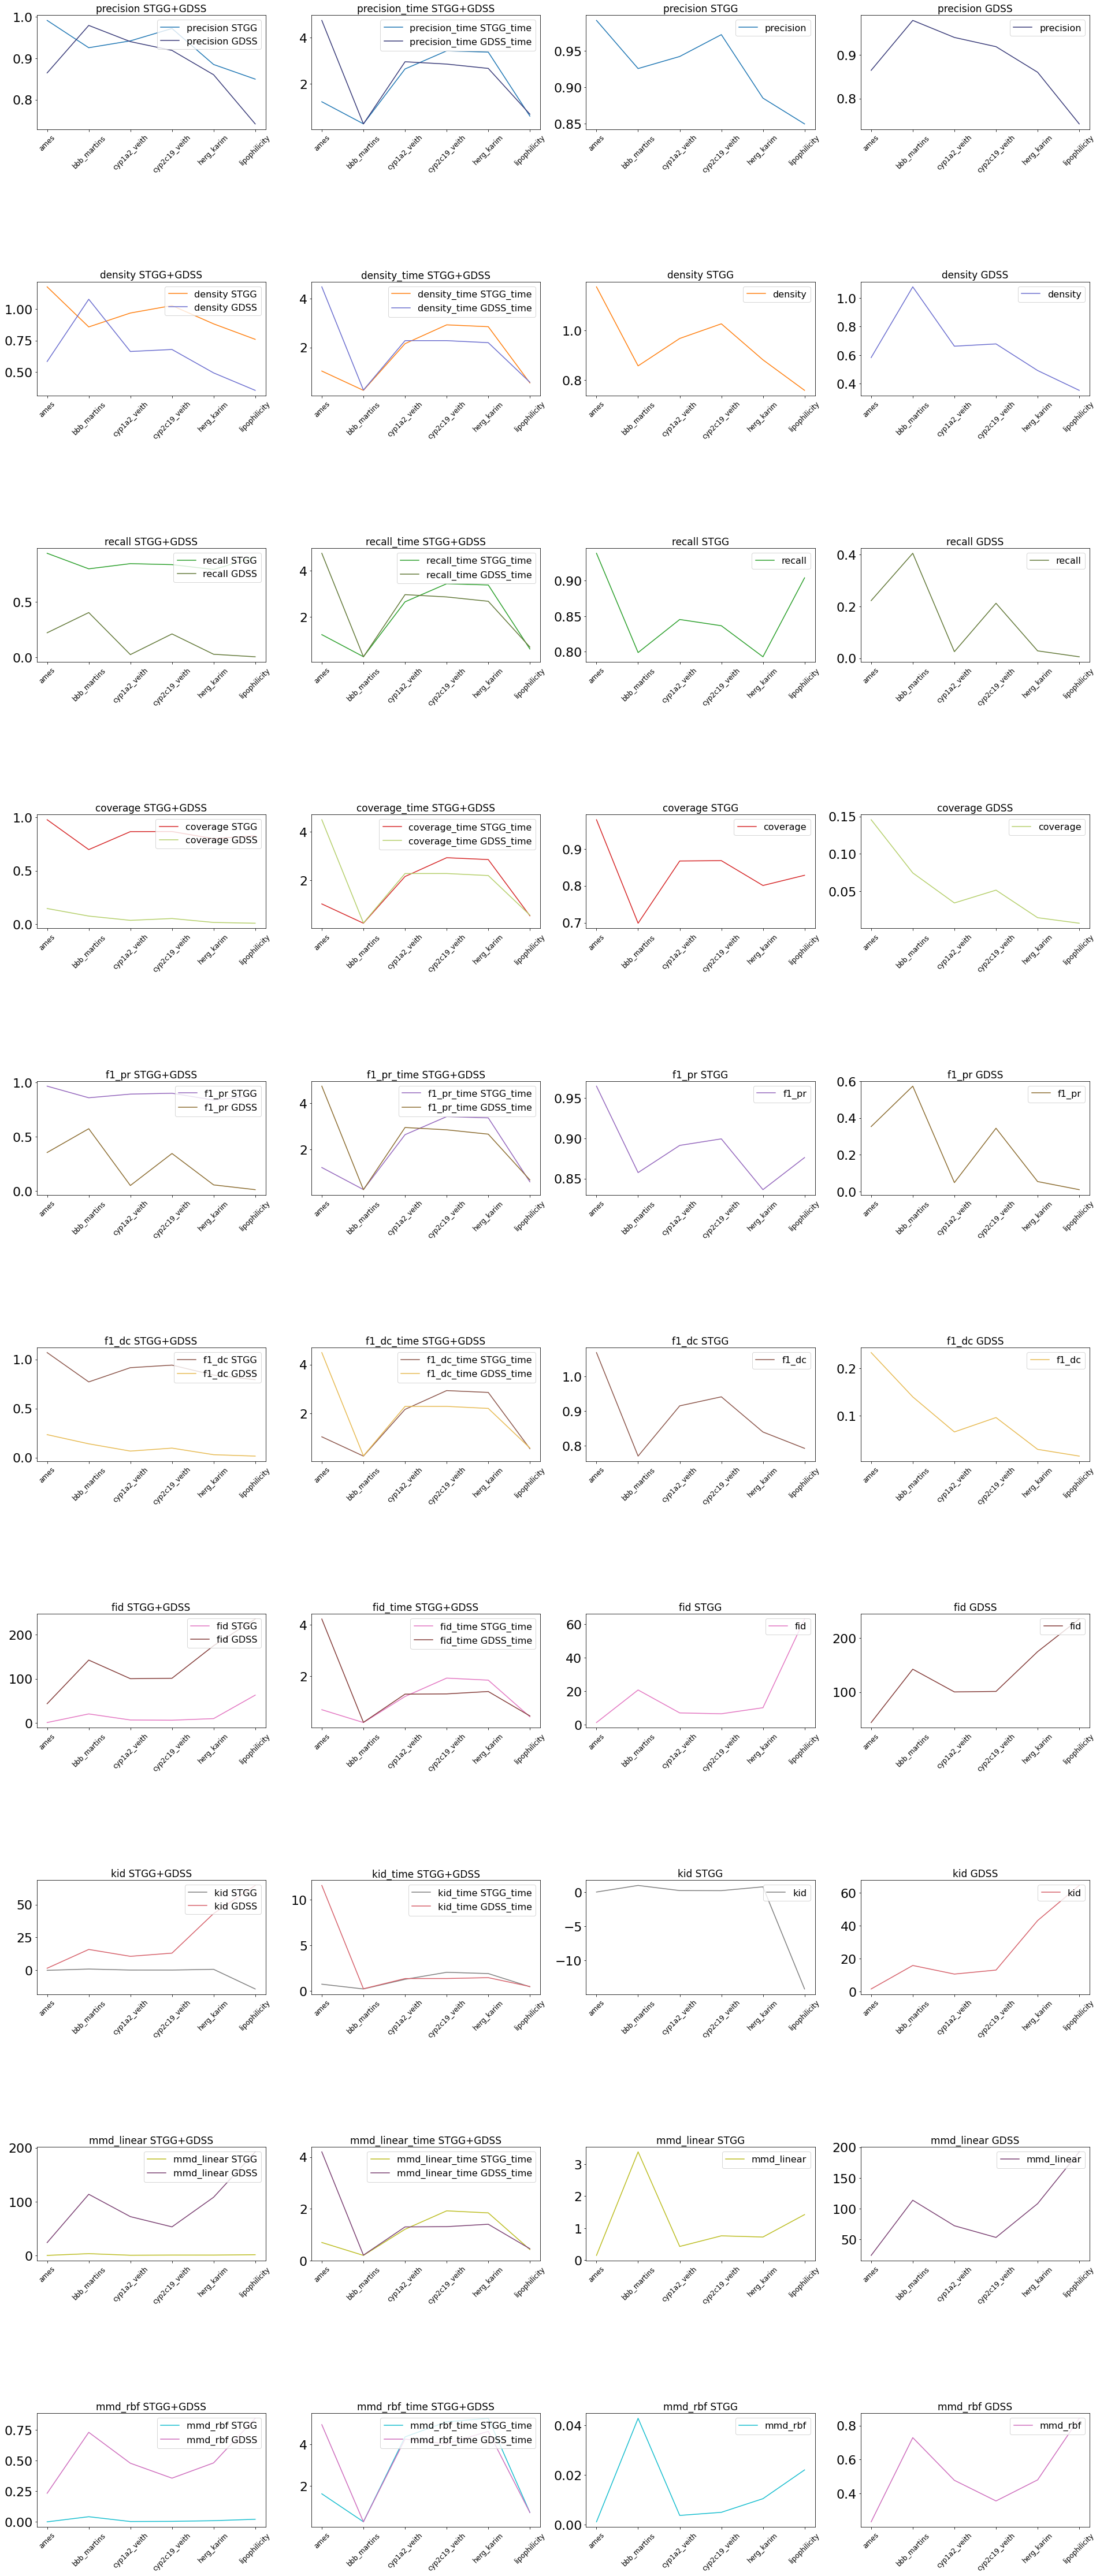

In [ ]:
nn_metrics = [ 'precision', 'density', 'recall', 'coverage', 'f1_pr', 'f1_dc', 'fid', 'kid', 'mmd_linear',
               'mmd_rbf']
to_plot=nn_metrics
to_plot2=[i+'_time' for i  in nn_metrics ]

cmapper = np.linspace(0, 1, len(to_plot))
cmapper = {key: cmapper[ix] for ix, key in enumerate(to_plot)}
cmap = plt.get_cmap('viridis')

def get_color(metric):
    return cmap(cmapper[metric])

cmapper_qualitative = {}
for c_ix, key in enumerate(to_plot):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative[key] = plt.cm.tab20(c_ix)

cmapper_qualitative2 = {}
for c_ix, key in enumerate(to_plot):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative2[key] = plt.cm.tab20b(c_ix)
                      
def get_color_qualitative(metric):
    return cmapper_qualitative[metric]


cmapper_qualitative3 = {}
for c_ix, key in enumerate(to_plot2):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative3[key] = plt.cm.tab20(c_ix)

cmapper_qualitative4 = {}
for c_ix, key in enumerate(to_plot2):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative4[key] = plt.cm.tab20b(c_ix)
                      
def get_color_qualitative2(metric):
    return cmapper_qualitative3[metric]

print('NN metrics')
generators= ['STGG', 'GDSS']

mask_STGG= df[df[ 'generator_name']=='STGG']
mask_GDSS=df[df[ 'generator_name']=='GDSS'].reset_index(drop=True)
datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity']

columns=4
rows=10
fig, ax = plt.subplots(rows,columns,figsize=(7.5, 80))
i=0
x_sticks=[0,1,2,3,4,5]

col=0
for r in range(0,rows):
    y=nn_metrics[i] 
    mask_STGG[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r,col],c = get_color_qualitative(y), label=nn_metrics[i]+' STGG')
    mask_GDSS[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r,col],c = cmapper_qualitative2[y],label=nn_metrics[i]+' GDSS')
    ax[r,col].legend(fontsize=16, loc=upper right)
    ax[r,col].set_title(y+' '+generators[0] +'+'+ generators[1],fontsize=17)
    ax[r,col].set_xticks(x_sticks)
    ax[r,col].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
    i+=1

plt.subplots_adjust(hspace=1.34,right=1.9)

i=0
col=1
for r in range(0,rows):
    y=to_plot2[i] 
    mask_STGG[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r,col],c = get_color_qualitative2(y), label=to_plot2[i]+' STGG_time')
    mask_GDSS[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r,col],c = cmapper_qualitative4[y],label=to_plot2[i]+' GDSS_time')
    ax[r,col].legend(fontsize=16, loc=upper right)
    ax[r,col].set_title(''+y+' '+generators[0] +'+'+ generators[1],fontsize=17)
    ax[r,col].set_xticks(x_sticks)
    ax[r,col].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
    i+=1

plt.subplots_adjust(hspace=1.34,right=1.9)

i=0
col=2
for r in range(0,rows):
    y=nn_metrics[i]
    mask_STGG[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r,col],c = get_color_qualitative(y))
    ax[r,col].legend(fontsize=16, loc=upper right)
    ax[r,col].set_title(y+' '+generators[0] ,fontsize=17)
    ax[r,col].set_xticks(x_sticks)
    ax[r,col].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
    i+=1
  
plt.subplots_adjust(hspace=1.34,right=1.9)
i=0
col=3
for r in range(0,rows):
    y=nn_metrics[i]
    mask_GDSS[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r,col],c = cmapper_qualitative2[y])
    ax[r,col].legend(fontsize=16, loc=upper right)
    ax[r,col].set_title(y+' '+generators[1] ,fontsize=17)
    ax[r,col].set_xticks(x_sticks)
    ax[r,col].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
    i+=1

         
plt.subplots_adjust(hspace=1.34,right=3.5)

#plt.subplots_adjust(hspace=3)



NN metrics


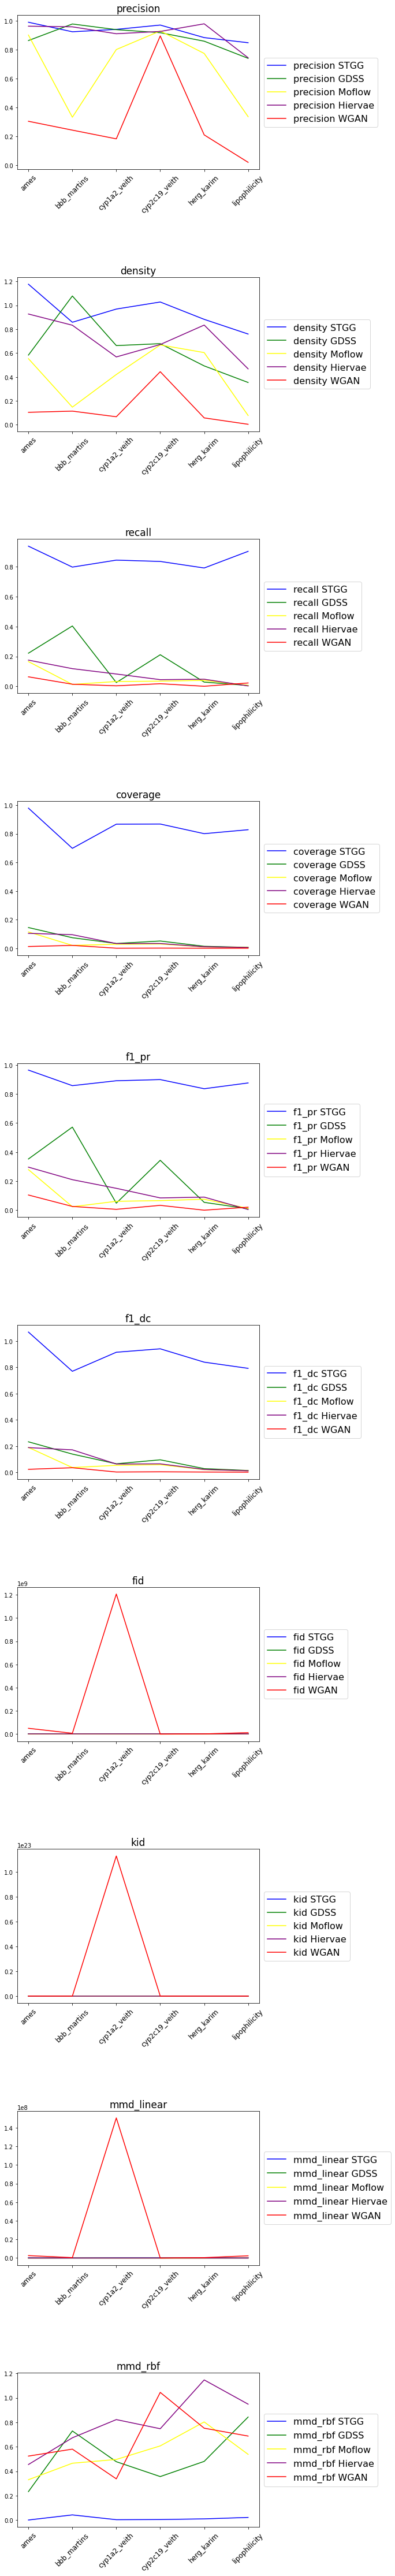

In [ ]:
nn_metrics = [ 'precision', 'density', 'recall', 'coverage', 'f1_pr', 'f1_dc', 'fid', 'kid', 'mmd_linear',
               'mmd_rbf']
to_plot=nn_metrics
to_plot2=[i+'_time' for i  in nn_metrics ]

cmapper = np.linspace(0, 1, len(to_plot))
cmapper = {key: cmapper[ix] for ix, key in enumerate(to_plot)}
cmap = plt.get_cmap('viridis')

def get_color(metric):
    return cmap(cmapper[metric])

cmapper_qualitative = {}
for c_ix, key in enumerate(to_plot):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative[key] = plt.cm.tab20(c_ix)

cmapper_qualitative2 = {}
for c_ix, key in enumerate(to_plot):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative2[key] = plt.cm.tab20b(c_ix)
                      
def get_color_qualitative(metric):
    return cmapper_qualitative[metric]


cmapper_qualitative3 = {}
for c_ix, key in enumerate(to_plot2):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative3[key] = plt.cm.tab20(c_ix)

cmapper_qualitative4 = {}
for c_ix, key in enumerate(to_plot2):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative4[key] = plt.cm.tab20b(c_ix)
                      
def get_color_qualitative2(metric):
    return cmapper_qualitative3[metric]

print('NN metrics')
generators= ['STGG', 'GDSS']

mask_STGG= df[df[ 'generator_name']=='STGG']
mask_GDSS=df[df[ 'generator_name']=='GDSS'].reset_index(drop=True)
datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity']

columns=1
rows=10
fig, ax = plt.subplots(rows,columns,figsize=(7.5, 80))
i=0
x_sticks=[0,1,2,3,4,5]


col=0
for r in range(0,rows):
    y=nn_metrics[i] 
    mask_STGG[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r],c = blue, label=nn_metrics[i]+' STGG')
    mask_GDSS.reset_index(drop=True)[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r],c = green, label=nn_metrics[i]+' GDSS')
    mask_moflow.reset_index(drop=True)[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r],c = yellow,label=nn_metrics[i]+' Moflow')
    mask_hiervae.reset_index(drop=True)[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r],c = purple,label=nn_metrics[i]+' Hiervae')
    mask_wgan.reset_index(drop=True)[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r],c = red,label=nn_metrics[i]+' WGAN')

    
    ax[r].legend(fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))
    ax[r].set_title(y,fontsize=17)
    ax[r].set_xticks(x_sticks)
    ax[r].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
    i+=1



plt.subplots_adjust(hspace=0.7)

         


#plt.subplots_adjust(hspace=3)

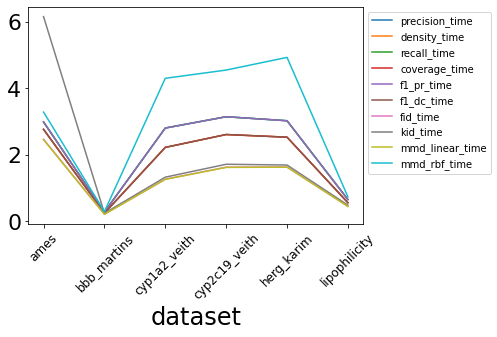

In [ ]:
ax=df.groupby('dataset').mean()[to_plot2].plot(subplots=False,rot=90)
ax.set_xticks(x_sticks)
ax.set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')



In [ ]:
    def score(r1,r2,r3,r4):
        #epsilon=1e-3
        r1=max(0.5, r1)
        r2=max(0.5, r2)
        r3=max(0.5, r3)
        r4=max(0.5, r4)
        if (r2-r1) <0:
            r2=r1
        else: 
            score1=min(1,(r4-0.5)/(r2-0.5))
            score2=min(1,(r3-0.5)/(r1-0.5))#min(1,1-max(0,r1-r3)/r1)
            #print(score1, score2)
            metric2=np.sqrt(score1*score2)
            metric=2*score1*score2/(score1+score2)
        return metric,metric2
   

In [ ]:
 def score(r1,r2,r3,r4):
        r1=max(0.5, r1)
        r2=max(0.5, r2)
        r3=max(0.5, r3)
        r4=max(0.5, r4)
        if (r2-r1) <0:
            r2=r1
        else: 
            score1=min(1,(r4-0.5)/(r2-0.5))
            score2=min(1,(r3-0.5)/(r1-0.5))
            metric=2*score1*score2/(score1+score2)
        return metric

In [ ]:
score(0.842753693	,0.848072671	,0.586177064	,0.857156589)


(0.40182273056254636, 0.5014236056886079)

In [ ]:
x=1-(0.842753693 - 0.586177064)/ 0.842753693 #r1-r3/r1
x

0.6955496829843022

In [ ]:
(0.857156589 -0.842753693)/ (0.848072671-0.842753693 )

2.7078314668720607

In [ ]:
r1=0.842753693
r2=0.848072671
r3=0.586177064
r4=0.857156589

In [ ]:
min(1,r4/r2)

1

In [ ]:
min(1,r1/r3)

1

In [ ]:
0.910001173


In [ ]:
{'activations_time': 0.6972849369049072, 'fid': 1.3730700501235589, 'fid_time': 0.701735258102417, 'kid': 0.020275593, 'kid_time': 0.746666669845581, 'precision': 0.9917517674783974, 'recall': 0.9387514723203769, 'f1_pr': 0.9645340888267413, 'precision_time': 1.2265045642852783, 'recall_time': 1.2265045642852783, 'f1_pr_time': 1.2265045642852783, 'density': 1.17643362136685, 'coverage': 0.9791912053396152, 'f1_dc': 1.0687985309867434, 'density_time': 1.0270962715148926, 'coverage_time': 1.0270962715148926, 'f1_dc_time': 1.0270962715148926, 'mmd_rbf': 0.0011846423149108887, 'mmd_rbf_time': 1.6261205673217773, 'mmd_linear': 0.14991595, 'mmd_linear_time': 0.6975932121276855, 'nspdk_mmd': 0.0005622522901392868, 'nspdk_mmd_time': 36.72433519363403, 'wl_mmd': 0.0003269389487676744, 'wl_mmd_time': 5.553701639175415, 'valid': 1.0, 'unique@1000': 0.584, 'unique@10000': 0.37038491751767477, 'FCD/Test': 0.0013606157713800526, 'SNN/Test': 0.9996399581198232, 'Frag/Test': 0.9999461721587711, 'FCD/TestSF': 52.96185071857515, 'SNN/TestSF': 0.08154201792891065, 'Frag/TestSF': 0.0, 'IntDiv': 0.3800599523174186, 'IntDiv2': 0.34724568561881564, 'Filters': 0.9603299293008641, 'logP': 0.1824547979061978, 'SA': 0.015304399874087713, 'QED': 0.0033933081396117287, 'weight': 8.570958668932956, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.910001173
, 'AUC_ROC_based_metric_with_nspdk_time': 283.3891921043396, 'AUC_ROC_based_metric_with_nn_classifier': 1.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 333.99452018737793, 'dataset': 'ames', 'generator_name': 'STGG'}
{'activations_time': 0.19810080528259277, 'fid': 20.81444319972904, 'fid_time': 0.2037804126739502, 'kid': 0.9810512, 'kid_time': 0.22387003898620605, 'precision': 0.9257142857142857, 'recall': 0.7985915492957747, 'f1_pr': 0.8574769730662182, 'precision_time': 0.2725381851196289, 'recall_time': 0.2725381851196289, 'f1_pr_time': 0.2725381851196289, 'density': 0.8580000000000001, 'coverage': 0.6985915492957746, 'f1_dc': 0.7701434768133962, 'density_time': 0.23220229148864746, 'coverage_time': 0.23220229148864746, 'f1_dc_time': 0.23220229148864746, 'mmd_rbf': 0.0428195595741272, 'mmd_rbf_time': 0.28669118881225586, 'mmd_linear': 3.3782942, 'mmd_linear_time': 0.19827604293823242, 'nspdk_mmd': 0.009430279510383721, 'nspdk_mmd_time': 13.982912063598633, 'wl_mmd': 0.011906629166907656, 'wl_mmd_time': 1.1368584632873535, 'valid': 1.0, 'unique@1000': 0.7914285714285715, 'unique@10000': 0.7914285714285715, 'FCD/Test': 0.007139263480682251, 'SNN/Test': 0.9984523808956146, 'Frag/Test': 0.999821519701264, 'FCD/TestSF': 53.114384958995274, 'SNN/TestSF': 0.08831308519733803, 'Frag/TestSF': 0.0, 'IntDiv': 0.32440933373898884, 'IntDiv2': 0.3016037541039601, 'Filters': 0.9828571428571429, 'logP': 1.030859565392356, 'SA': 0.03097179948274566, 'QED': 0.02274132451913345, 'weight': 46.6913468410463, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.804490084
, 'AUC_ROC_based_metric_with_nspdk_time': 111.25716543197632, 'AUC_ROC_based_metric_with_nn_classifier': 0, 'AUC_ROC_based_metric_with_nn_classifier_time': 110.89890050888062, 'dataset': 'bbb_martins', 'generator_name': 'STGG'}
{'activations_time': 1.208451747894287, 'fid': 7.121787957581233, 'fid_time': 1.2144274711608887, 'kid': 0.23448715, 'kid_time': 1.2788450717926025, 'precision': 0.9422762327646647, 'recall': 0.8452624403544649, 'f1_pr': 0.8911467863503494, 'precision_time': 2.6448419094085693, 'recall_time': 2.6448419094085693, 'f1_pr_time': 2.6448419094085693, 'density': 0.968450572563683, 'coverage': 0.8673028857077937, 'f1_dc': 0.9151002048752968, 'density_time': 2.1560988426208496, 'coverage_time': 2.1560988426208496, 'f1_dc_time': 2.1560988426208496, 'mmd_rbf': 0.003762543201446533, 'mmd_rbf_time': 4.3512022495269775, 'mmd_linear': 0.42875808, 'mmd_linear_time': 1.2089307308197021, 'nspdk_mmd': 0.0015962017862793387, 'nspdk_mmd_time': 102.67038464546204, 'wl_mmd': 0.002456137456197993, 'wl_mmd_time': 15.675324440002441, 'valid': 1.0, 'unique@1000': 0.771, 'unique@10000': 0.5251226922178079, 'FCD/Test': 0.0034983721854049965, 'SNN/Test': 0.9988660012193583, 'Frag/Test': 0.99995713569845, 'FCD/TestSF': 53.00698730788398, 'SNN/TestSF': 0.09298031675892891, 'Frag/TestSF': 0.0, 'IntDiv': 0.26056297702640274, 'IntDiv2': 0.24418739008622714, 'Filters': 0.9869128301004908, 'logP': 0.20763753675350274, 'SA': 0.00950368739311667, 'QED': 0.003978334427847486, 'weight': 12.69124381034947, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.190641864
, 'AUC_ROC_based_metric_with_nspdk_time': 3284.773894548416, 'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 716.1019458770752, 'dataset': 'cyp1a2_veith', 'generator_name': 'STGG'}
{'activations_time': 1.9201786518096924, 'fid': 6.600334170645894, 'fid_time': 1.9281785488128662, 'kid': 0.2239254, 'kid_time': 2.050598621368408, 'precision': 0.97223507635354, 'recall': 0.8364538687119333, 'f1_pr': 0.8992578713358133, 'precision_time': 3.4258999824523926, 'recall_time': 3.4258999824523926, 'f1_pr_time': 3.4258999824523926, 'density': 1.0274872744099954, 'coverage': 0.868260771486578, 'f1_dc': 0.9411972662830664, 'density_time': 2.9300408363342285, 'coverage_time': 2.9300408363342285, 'f1_dc_time': 2.9300408363342285, 'mmd_rbf': 0.005007147789001465, 'mmd_rbf_time': 5.071700096130371, 'mmd_linear': 0.760029, 'mmd_linear_time': 1.9206738471984863, 'nspdk_mmd': 0.001434614294098524, 'nspdk_mmd_time': 102.37603640556335, 'wl_mmd': 0.001556158258841478, 'wl_mmd_time': 13.456374168395996, 'valid': 1.0, 'unique@1000': 0.793, 'unique@10000': 0.512956964368348, 'FCD/Test': 0.004013351620449301, 'SNN/Test': 0.9992480333454904, 'Frag/Test': 0.9999463038125749, 'FCD/TestSF': 53.021617869858176, 'SNN/TestSF': 0.09286358533362474, 'Frag/TestSF': 0.0, 'IntDiv': 0.26635707687023025, 'IntDiv2': 0.24986048677947115, 'Filters': 0.987968533086534, 'logP': 0.2088009681396506, 'SA': 0.007882730593060118, 'QED': 0.013001109618728465, 'weight': 15.789799556416781, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.032062602
, 'AUC_ROC_based_metric_with_nspdk_time': 3484.9689717292786, 'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 739.4050765037537, 'dataset': 'cyp2c19_veith', 'generator_name': 'STGG'}
{'activations_time': 1.8413212299346924, 'fid': 10.220529922694851, 'fid_time': 1.848252773284912, 'kid': 0.7802348, 'kid_time': 1.910412311553955, 'precision': 0.8851747341002821, 'recall': 0.7926051848703782, 'f1_pr': 0.8363462814967519, 'precision_time': 3.371870994567871, 'recall_time': 3.371870994567871, 'f1_pr_time': 3.371870994567871, 'density': 0.8823529411764707, 'coverage': 0.8008924776880578, 'f1_dc': 0.8396615980919553, 'density_time': 2.8540852069854736, 'coverage_time': 2.8540852069854736, 'f1_dc_time': 2.8540852069854736, 'mmd_rbf': 0.01049584150314331, 'mmd_rbf_time': 5.239339590072632, 'mmd_linear': 0.7230252, 'mmd_linear_time': 1.8417952060699463, 'nspdk_mmd': 0.0017869361928026795, 'nspdk_mmd_time': 141.74938821792603, 'wl_mmd': 0.0008978034637869836, 'wl_mmd_time': 20.328009843826294, 'valid': 1.0, 'unique@1000': 0.851, 'unique@10000': 0.612763186455394, 'FCD/Test': 0.00024197395439350122, 'SNN/Test': 0.9992542404504358, 'Frag/Test': 0.9998974921216999, 'FCD/TestSF': 53.068716505903346, 'SNN/TestSF': 0.09211062688468619, 'Frag/TestSF': 0.0, 'IntDiv': 0.30187157627140615, 'IntDiv2': 0.2842800197515446, 'Filters': 0.9837204254395485, 'logP': 0.72592284964555, 'SA': 0.026496641340091283, 'QED': 0.012330489439057376, 'weight': 25.829937213285547, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.095644099
, 'AUC_ROC_based_metric_with_nspdk_time': 4579.832501888275, 'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 923.7170689105988, 'dataset': 'herg_karim', 'generator_name': 'STGG'}
{'activations_time': 0.4229869842529297, 'fid': 63.188534521222635, 'fid_time': 0.42696523666381836, 'kid': -14.156975, 'kid_time': 0.4654371738433838, 'precision': 0.8497913769123783, 'recall': 0.9040816326530612, 'f1_pr': 0.8761062506017878, 'precision_time': 0.6060471534729004, 'recall_time': 0.6060471534729004, 'f1_pr_time': 0.6060471534729004, 'density': 0.7593880389429764, 'coverage': 0.8285714285714286, 'f1_dc': 0.7924826798253358, 'density_time': 0.5380127429962158, 'coverage_time': 0.5380127429962158, 'f1_dc_time': 0.5380127429962158, 'mmd_rbf': 0.022064030170440674, 'mmd_rbf_time': 0.7312338352203369, 'mmd_linear': 1.4224219, 'mmd_linear_time': 0.4231743812561035, 'nspdk_mmd': 0.005077665272535503, 'nspdk_mmd_time': 35.954652309417725, 'wl_mmd': 0.0027364365709998673, 'wl_mmd_time': 2.934135675430298, 'valid': 1.0, 'unique@1000': 0.831, 'unique@10000': 0.786509040333797, 'FCD/Test': 0.0005093490707978043, 'SNN/Test': 0.9965924895025261, 'Frag/Test': 0.9998978878979857, 'FCD/TestSF': 53.07012854496585, 'SNN/TestSF': 0.09141021877040204, 'Frag/TestSF': 0.0, 'IntDiv': 0.3106891900730292, 'IntDiv2': 0.2921671860603138, 'Filters': 0.9916550764951322, 'logP': 1.0986143831663413, 'SA': 0.029205097693421025, 'QED': 0.019139389646281382, 'weight': 36.52365276602991, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.768539357
, 'AUC_ROC_based_metric_with_nspdk_time': 278.9503297805786, 'AUC_ROC_based_metric_with_nn_classifier': 0.3676947464941529, 'AUC_ROC_based_metric_with_nn_classifier_time': 267.49090576171875, 'dataset': 'lipophilicity_astrazeneca', 'generator_name': 'STGG'}
{'activations_time': 4.199569225311279, 'fid': 43.82522469398919, 'fid_time': 4.221216201782227, 'kid': 1.6082268, 'kid_time': 11.56338119506836, 'precision': 0.8648111332007953, 'recall': 0.22182960345504515, 'f1_pr': 0.3531029893271447, 'precision_time': 4.742654800415039, 'recall_time': 4.742654800415039, 'f1_pr_time': 4.742654800415039, 'density': 0.583220675944334, 'coverage': 0.14566156262269336, 'f1_dc': 0.2331180217015843, 'density_time': 4.4952003955841064, 'coverage_time': 4.4952003955841064, 'f1_dc_time': 4.4952003955841064, 'mmd_rbf': 0.23331719636917114, 'mmd_rbf_time': 4.936238765716553, 'mmd_linear': 23.882147, 'mmd_linear_time': 4.199988603591919, 'nspdk_mmd': 0.10812884345694809, 'nspdk_mmd_time': 24.102604150772095, 'wl_mmd': 0.09365006091596262, 'wl_mmd_time': 3.545039653778076, 'valid': 1.0, 'unique@1000': 0.114, 'unique@10000': 0.057256461232604375, 'FCD/Test': 0.1082776819395091, 'SNN/Test': 1.0, 'Frag/Test': 0.9818105253684924, 'FCD/TestSF': 53.23105309835924, 'SNN/TestSF': 0.04995325374940992, 'Frag/TestSF': 0.0, 'IntDiv': 0.18560363843591055, 'IntDiv2': 0.15886393607185023, 'Filters': 1.0, 'logP': 0.3905472610586972, 'SA': 0.09647881846018505, 'QED': 0.08268655489784607, 'weight': 120.22772478564033, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.0, 'AUC_ROC_based_metric_with_nspdk_time': 190.3498957157135, 'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 324.8223853111267, 'dataset': 'ames', 'generator_name': 'GDSS'}
{'activations_time': 0.20775556564331055, 'fid': 142.26608723718223, 'fid_time': 0.21066904067993164, 'kid': 15.899505, 'kid_time': 0.2463524341583252, 'precision': 0.9796511627906976, 'recall': 0.4042253521126761, 'f1_pr': 0.5723168905002435, 'precision_time': 0.2687094211578369, 'recall_time': 0.2687094211578369, 'f1_pr_time': 0.2687094211578369, 'density': 1.0779069767441862, 'coverage': 0.07464788732394366, 'f1_dc': 0.13964386471224743, 'density_time': 0.24391388893127441, 'coverage_time': 0.24391388893127441, 'f1_dc_time': 0.24391388893127441, 'mmd_rbf': 0.7290270328521729, 'mmd_rbf_time': 0.2839531898498535, 'mmd_linear': 113.63526, 'mmd_linear_time': 0.2079486846923828, 'nspdk_mmd': 0.21555583973980563, 'nspdk_mmd_time': 7.707469701766968, 'wl_mmd': 0.29130528122701105, 'wl_mmd_time': 0.7291803359985352, 'valid': 1.0, 'unique@1000': 0.06831395348837209, 'unique@10000': 0.06831395348837209, 'FCD/Test': 0.07348345474169694, 'SNN/Test': 1.0, 'Frag/Test': 0.9791452714695998, 'FCD/TestSF': 53.23109126782355, 'SNN/TestSF': 0.04437812233105475, 'Frag/TestSF': 0.0, 'IntDiv': 0.035911811113744085, 'IntDiv2': 0.0313120348225997, 'Filters': 1.0, 'logP': 4.999431112839826, 'SA': 0.1774669893155172, 'QED': 0.07882322651284988, 'weight': 288.0337310227646, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.403886584
, 'AUC_ROC_based_metric_with_nspdk_time': 70.26457071304321, 'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 98.97541451454163, 'dataset': 'bbb_martins', 'generator_name': 'GDSS'}
{'activations_time': 1.2995493412017822, 'fid': 100.31197596102638, 'fid_time': 1.3058788776397705, 'kid': 10.664678, 'kid_time': 1.3632407188415527, 'precision': 0.9404545454545454, 'recall': 0.025221540558963872, 'f1_pr': 0.04914459044948833, 'precision_time': 2.9557430744171143, 'recall_time': 2.9557430744171143, 'f1_pr_time': 2.9557430744171143, 'density': 0.6628636363636364, 'coverage': 0.03453760508975233, 'f1_dc': 0.06567249533660652, 'density_time': 2.2794203758239746, 'coverage_time': 2.2794203758239746, 'f1_dc_time': 2.2794203758239746, 'mmd_rbf': 0.47780346870422363, 'mmd_rbf_time': 4.244511604309082, 'mmd_linear': 72.125145, 'mmd_linear_time': 1.3001699447631836, 'nspdk_mmd': 0.09982822234922056, 'nspdk_mmd_time': 66.49629592895508, 'wl_mmd': 0.11894784284753546, 'wl_mmd_time': 10.794298887252808, 'valid': 1.0, 'unique@1000': 0.239, 'unique@10000': 0.09704545454545455, 'FCD/Test': 0.0957441425401345, 'SNN/Test': 0.9952651517770507, 'Frag/Test': 0.9846703749332534, 'FCD/TestSF': 53.20992239276433, 'SNN/TestSF': 0.059704143315215, 'Frag/TestSF': 0.0, 'IntDiv': 0.3684426302129571, 'IntDiv2': 0.3216479206320406, 'Filters': 0.9979545454545454, 'logP': 1.2072143891677498, 'SA': 0.23572528004713456, 'QED': 0.07489953337830513, 'weight': 172.80978128013268, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.469383141
, 'AUC_ROC_based_metric_with_nspdk_time': 438.8825173377991, 'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 662.6937291622162, 'dataset': 'cyp1a2_veith', 'generator_name': 'GDSS'}
{'activations_time': 1.3090720176696777, 'fid': 101.24594890918588, 'fid_time': 1.3151416778564453, 'kid': 13.099751, 'kid_time': 1.369093894958496, 'precision': 0.9192420482743063, 'recall': 0.2115948567561471, 'f1_pr': 0.34401911883385655, 'precision_time': 2.8552377223968506, 'recall_time': 2.8552377223968506, 'f1_pr_time': 2.8552377223968506, 'density': 0.6787728400631626, 'coverage': 0.05165801939995488, 'f1_dc': 0.09602662381564576, 'density_time': 2.2796337604522705, 'coverage_time': 2.2796337604522705, 'f1_dc_time': 2.2796337604522705, 'mmd_rbf': 0.356250524520874, 'mmd_rbf_time': 4.020052194595337, 'mmd_linear': 53.12918, 'mmd_linear_time': 1.3096535205841064, 'nspdk_mmd': 0.06854646498242895, 'nspdk_mmd_time': 72.823481798172, 'wl_mmd': 0.0838966808886894, 'wl_mmd_time': 11.124818801879883, 'valid': 1.0, 'unique@1000': 0.447, 'unique@10000': 0.20302278366794496, 'FCD/Test': 0.09470963690418298, 'SNN/Test': 0.9999248063809012, 'Frag/Test': 0.9960326452754109, 'FCD/TestSF': 53.20941616911102, 'SNN/TestSF': 0.07753953943816878, 'Frag/TestSF': 0.0, 'IntDiv': 0.326665222442569, 'IntDiv2': 0.28871847010656526, 'Filters': 1.0, 'logP': 2.0260723889014196, 'SA': 0.15627967419156266, 'QED': 0.0858201554615308, 'weight': 139.7329663884503, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.387284024
, 'AUC_ROC_based_metric_with_nspdk_time': 388.080420255661, 'AUC_ROC_based_metric_with_nn_classifier': 0, 'AUC_ROC_based_metric_with_nn_classifier_time': 682.2305762767792, 'dataset': 'cyp2c19_veith', 'generator_name': 'GDSS'}
{'activations_time': 1.4015915393829346, 'fid': 174.68413584376418, 'fid_time': 1.407839059829712, 'kid': 43.20504, 'kid_time': 1.462787389755249, 'precision': 0.8603909902252443, 'recall': 0.028261793455163622, 'f1_pr': 0.054744737390347166, 'precision_time': 2.6677498817443848, 'recall_time': 2.6677498817443848, 'f1_pr_time': 2.6677498817443848, 'density': 0.4927326816829579, 'coverage': 0.014874628134296642, 'f1_dc': 0.02889636330002525, 'density_time': 2.1958069801330566, 'coverage_time': 2.1958069801330566, 'f1_dc_time': 2.1958069801330566, 'mmd_rbf': 0.4803563356399536, 'mmd_rbf_time': 4.6150970458984375, 'mmd_linear': 108.104485, 'mmd_linear_time': 1.4022886753082275, 'nspdk_mmd': 0.07597198106285569, 'nspdk_mmd_time': 101.66402220726013, 'wl_mmd': 0.10657693883084507, 'wl_mmd_time': 13.78585433959961, 'valid': 1.0, 'unique@1000': 0.322, 'unique@10000': 0.1228219294517637, 'FCD/Test': 0.05971665279936909, 'SNN/Test': 0.9999291684416777, 'Frag/Test': 0.9936213767840466, 'FCD/TestSF': 53.23088432403301, 'SNN/TestSF': 0.06361647856236137, 'Frag/TestSF': 0.0, 'IntDiv': 0.21566382863891953, 'IntDiv2': 0.19024632107993622, 'Filters': 1.0, 'logP': 1.8135507649808718, 'SA': 0.28514542553433436, 'QED': 0.10931038805118157, 'weight': 163.96126880577987, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk': 0.0, 'AUC_ROC_based_metric_with_nspdk_time': 557.5234231948853, 'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 790.258024930954, 'dataset': 'herg_karim', 'generator_name': 'GDSS'}
{'activations_time': 0.45628976821899414, 'fid': 234.91739875183632, 'fid_time': 0.46004533767700195, 'kid': 64.5617, 'kid_time': 0.4924795627593994, 'precision': 0.7414965986394558, 'recall': 0.005442176870748299, 'f1_pr': 0.010824761042128098, 'precision_time': 0.689732551574707, 'recall_time': 0.689732551574707, 'f1_pr_time': 0.689732551574707, 'density': 0.3540136054421769, 'coverage': 0.007482993197278911, 'f1_dc': 0.014675378542714968, 'density_time': 0.5663654804229736, 'coverage_time': 0.5663654804229736, 'f1_dc_time': 0.5663654804229736, 'mmd_rbf': 0.8428565263748169, 'mmd_rbf_time': 0.7265541553497314, 'mmd_linear': 192.30867, 'mmd_linear_time': 0.4565584659576416, 'nspdk_mmd': 0.17514390137914065, 'nspdk_mmd_time': 19.532440662384033, 'wl_mmd': 0.2430072756903483, 'wl_mmd_time': 2.003753185272217, 'valid': 1.0, 'unique@1000': 0.069, 'unique@10000': 0.05510204081632653, 'FCD/Test': 0.046632838547228585, 'SNN/Test': 0.551927437668755, 'Frag/Test': 0.9782833961395954, 'FCD/TestSF': 53.23109317280172, 'SNN/TestSF': 0.04594374568436016, 'Frag/TestSF': 0.0, 'IntDiv': 0.098918800267503, 'IntDiv2': 0.08614753083855586, 'Filters': 1.0, 'logP': 4.754169115646253, 'SA': 0.31572009041174576, 'QED': 0.11037562570132356, 'weight': 290.0305421768708, 'Novelty': 1.0, 'AUC_ROC_based_metric_with_nspdk':0.183009464
, 'AUC_ROC_based_metric_with_nspdk_time': 154.14641952514648, 'AUC_ROC_based_metric_with_nn_classifier': 0.0, 'AUC_ROC_based_metric_with_nn_classifier_time': 226.28317093849182, 'dataset': 'lipophilicity_astrazeneca', 'generator_name': 'GDSS'}

{'activations_time': 0.45628976821899414,
 'fid': 234.91739875183632,
 'fid_time': 0.46004533767700195,
 'kid': 64.5617,
 'kid_time': 0.4924795627593994,
 'precision': 0.7414965986394558,
 'recall': 0.005442176870748299,
 'f1_pr': 0.010824761042128098,
 'precision_time': 0.689732551574707,
 'recall_time': 0.689732551574707,
 'f1_pr_time': 0.689732551574707,
 'density': 0.3540136054421769,
 'coverage': 0.007482993197278911,
 'f1_dc': 0.014675378542714968,
 'density_time': 0.5663654804229736,
 'coverage_time': 0.5663654804229736,
 'f1_dc_time': 0.5663654804229736,
 'mmd_rbf': 0.8428565263748169,
 'mmd_rbf_time': 0.7265541553497314,
 'mmd_linear': 192.30867,
 'mmd_linear_time': 0.4565584659576416,
 'nspdk_mmd': 0.17514390137914065,
 'nspdk_mmd_time': 19.532440662384033,
 'wl_mmd': 0.2430072756903483,
 'wl_mmd_time': 2.003753185272217,
 'valid': 1.0,
 'unique@1000': 0.069,
 'unique@10000': 0.05510204081632653,
 'FCD/Test': 0.046632838547228585,
 'SNN/Test': 0.551927437668755,
 'Frag/Test':

# Structural metrics



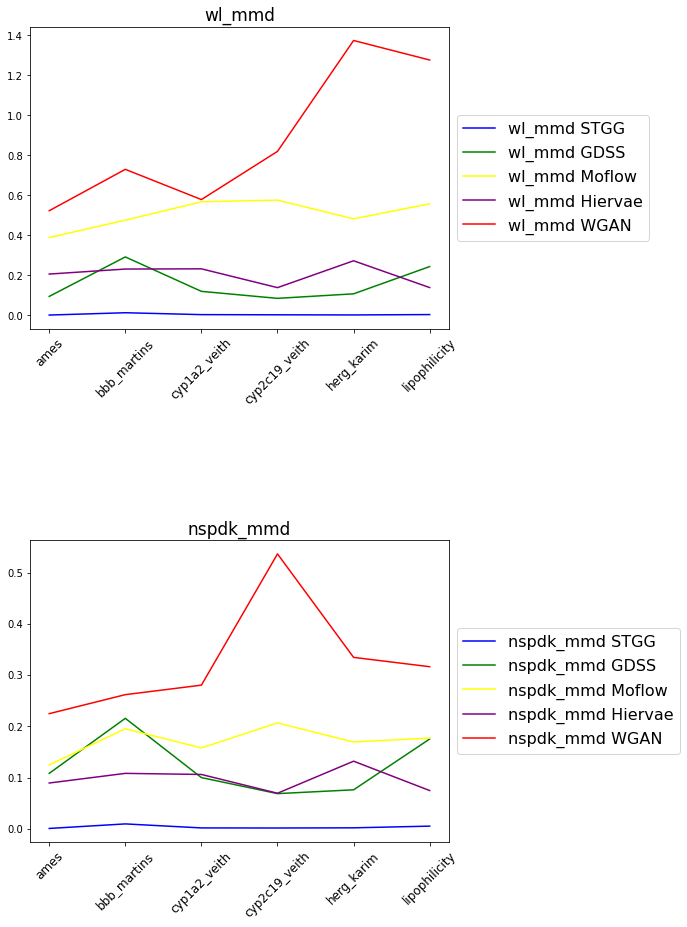

In [ ]:
structural_metrics=['wl_mmd','nspdk_mmd']


columns=1
rows=2
fig, ax = plt.subplots(rows,columns,figsize=(7.5, 15))
i=0
x_sticks=[0,1,2,3,4,5]


col=0
for r in range(0,rows):
    y=structural_metrics[i] 
    mask_STGG[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r],c = blue, label=structural_metrics[i]+' STGG')
    mask_GDSS.reset_index(drop=True)[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r],c = green, label=structural_metrics[i]+' GDSS')
    mask_moflow.reset_index(drop=True)[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r],c = yellow,label=structural_metrics[i]+' Moflow')
    mask_hiervae.reset_index(drop=True)[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r],c = purple,label=structural_metrics[i]+' Hiervae')
    mask_wgan.reset_index(drop=True)[y].plot(x=x_sticks, y=y,kind='line', ax=ax[r],c = red,label=structural_metrics[i]+' WGAN')

    
    ax[r].legend(fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))
    ax[r].set_title(y,fontsize=17)
    ax[r].set_xticks(x_sticks)
    ax[r].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
    i+=1



plt.subplots_adjust(hspace=0.7)

c:\Users\cs843\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3398: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


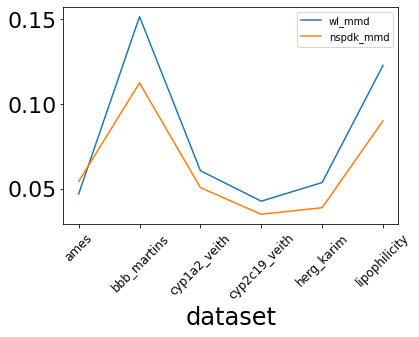

In [ ]:
structural_metrics=['wl_mmd','nspdk_mmd']
ax=df.groupby('dataset').mean()[structural_metrics].plot(subplots=False,rot=90)
ax.set_xticks(x_sticks)
ax.set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')

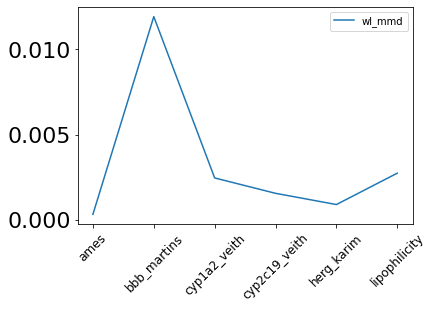

In [ ]:
structural_metrics=['wl_mmd']
ax=mask_STGG[structural_metrics].plot(subplots=False,rot=90)
ax.set_xticks(x_sticks)
ax.set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')

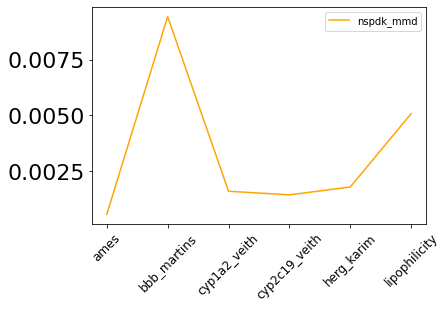

In [ ]:
structural_metrics=['nspdk_mmd']
ax=mask_STGG[structural_metrics].plot(subplots=False,rot=90,c='orange')
ax.set_xticks(x_sticks)
ax.set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')

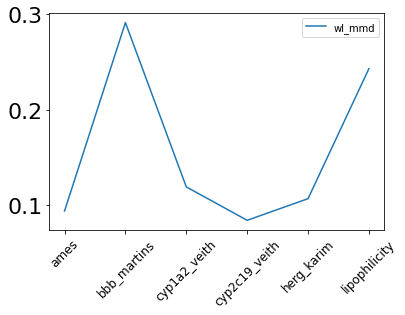

In [ ]:
structural_metrics=['wl_mmd']
ax=mask_GDSS[structural_metrics].plot(subplots=False,rot=90)
ax.set_xticks(x_sticks)
ax.set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')

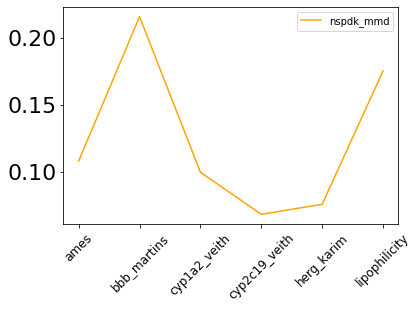

In [ ]:
structural_metrics=['nspdk_mmd']
ax=mask_GDSS[structural_metrics].plot(subplots=False,rot=90,c=orange,label= 'GDSS')
ax.set_xticks(x_sticks)
ax.set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')

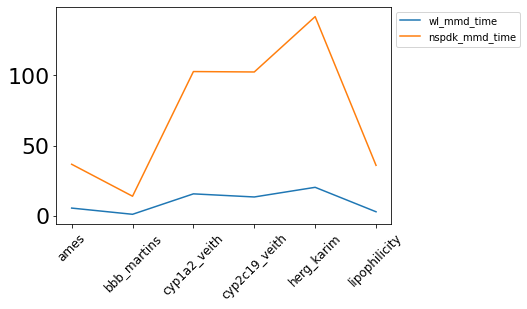

In [ ]:
structural_metrics=['wl_mmd_time','nspdk_mmd_time']
ax=df.groupby('dataset').mean()[structural_metrics].plot(subplots=False,rot=90)
ax.set_xticks(x_sticks)
ax.set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')

In [ ]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import os


generators=['STGG','GDSS']
datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
nn_metrics = [ 'precision', 'density', 'recall', 'coverage', 'f1_pr', 'f1_dc', 'fid', 'kid', 'mmd_linear',
               'mmd_rbf']
structural_metrics = ['wl_mmd', 'nspdk_mmd']#'clustering_mmd', 'degree_mmd',orbits_mmd

dont_plot = ['wl_mmd']
to_plot = [metric for metric in nn_metrics + structural_metrics if metric not in dont_plot]
print(to_plot)

molecular_metrics=['valid', 'unique@1000', 'unique@10000', 'FCD/Test', 'SNN/Test' , 'Frag/Test', 'FCD/TestSF','SNN/TestSF',
 'Frag/TestSF', 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight', 'Novelty']

new_metrics=['AUC_ROC_based_metric_with_nspdk','AUC_ROC_based_metric_with_nn_classifier']

all_metrics = list(set(nn_metrics + structural_metrics + molecular_metrics + new_metrics ))
metrics_types=['nn_metrics','structural_metrics','molecular_metrics','new_metrics']

cmapper = np.linspace(0, 1, len(to_plot))
cmapper = {key: cmapper[ix] for ix, key in enumerate(to_plot)}
cmap = plt.get_cmap('viridis')
def get_color(metric):
    return cmap(cmapper[metric])

cmapper_qualitative = {}
for c_ix, key in enumerate(to_plot):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative[key] = plt.cm.tab20(c_ix)
                      
def get_color_qualitative(metric):
    return cmapper_qualitative[metric]


def should_plot(metric):
    return metric not in dont_plot

def get_label(metric):
    metric_to_label = {'mmd_linear': 'MMD Linear',
                       'mmd_rbf': 'MMD RBF',
                       'fid': 'FD',
                       'kid': 'KD',
                        'nspdk_mmd': 'NSPDK MMD',
                       'degree_mmd': 'Degree MMD',
                       'clustering_mmd': 'Clustering MMD',
                       'wl_mmd': 'WL MMD',
                       'orbits_mmd': 'Orbits MMD',
                       'f1_pr': 'F1 PR',
                       'f1_dc': 'F1 DC',
                       'AUC_ROC_based_metric_with_nspdk': 'New metric NSPDK',
                       'AUC_ROC_based_metric_with_nn_classifier': 'New metric NN',}
#                        
    
    if metric in metric_to_label:
        return metric_to_label[metric]
    elif '_' not in metric: # PRDC
        return metric.title()
    elif 'mmd' not in metric: # F1 scores
        return ' '.join(metric.split('_')).upper()

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=24) # 26     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('figure', titlesize=12)  # fontsize of the figure title

['precision', 'density', 'recall', 'coverage', 'f1_pr', 'f1_dc', 'fid', 'kid', 'mmd_linear', 'mmd_rbf', 'clustering_mmd', 'degree_mmd', 'orbits_mmd', 'nspdk_mmd']


In [ ]:
ames_filter=df.loc[df['dataset']=='ames' ]
bbb_martins_filter=df.loc[df['dataset']=='bbb_martins' ]
cyp1a2_veith_filter=df.loc[df['dataset']=='cyp1a2_veith' ]
cyp2c19_veith_filter=df.loc[df['dataset']=='cyp2c19_veith' ]
herg_karim_filter=df.loc[df['dataset']=='herg_karim' ]
lipophilicity_astrazeneca_filter=df.loc[df['dataset']=='lipophilicity_astrazeneca' ]


# Draft section